<a href="https://colab.research.google.com/github/descartesmbogning/phage-therapy-patents-analysis/blob/main/4_diseases_classif_patent_analysis_23102023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data


In [115]:
#!pip install nltk matplotlib wordcloud scikit-learn


In [116]:
import nltk
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
nltk.download('punkt')
import textwrap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
stopwords_list = list(s)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
# Load your dataset (Assuming it's a CSV with a column 'abstract' for patent abstracts)

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd
import glob

folder_path = '/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/'  # Modify with your path
common_name = 'data_patent_therapy_and_diseases_Microorganisms_Taxon_chunk_23102023*'  # Modify with the common part of the filename

# List all files that have the common part in their names
all_files = glob.glob(folder_path + common_name + ".csv*")

# Empty list to store dataframes
dfs = []

for filename in all_files:
    # Read each csv file into a dataframe
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
Diseases_data = pd.concat(dfs, ignore_index=True)

# If you want to save the merged dataframe to a new Excel file:
Diseases_data.to_csv(folder_path + "data_patent_therapy_diseases_Microorganisms_Taxon_chunk_merged_data_20102023.csv", index=False)
Diseases_data['Application Year'] = pd.to_datetime(Diseases_data['Application Date']).dt.year
Diseases_data['Application Year'] = Diseases_data['Application Year'].astype('Int64')
pd.set_option('display.max_columns', None)
Diseases_data

# Jurisdiction Kind         Display Key              Lens ID  \
0        1           RU   C2       RU 2214829 C2  069-390-611-717-343   
1        2           JP    A     JP 2016104011 A  114-759-028-882-736   
2        3           AU   A1   AU 2015/255318 A1  094-982-928-461-863   
3        4           US   A1  US 2016/0022747 A1  167-908-891-122-112   
4        5           AU   A1   AU 2017/204331 A1  112-018-476-081-94X   
...    ...          ...  ...                 ...                  ...   
2361  2361           GB    A        GB 1165745 A  150-422-589-010-681   
2362  2362           GB    A        GB 1165354 A  058-819-734-343-222   
2363  2363           SG    A   SG 11201907220U A  104-088-331-962-598   
2364  2364           SG    A   SG 11201905788V A  147-487-067-847-82X   
2365  2365           EA   B1        EA 004497 B1  121-474-665-038-612   

     Publication Date  Publication Year Application Number Application Date  \
0          2003-10-27              2003    RU 2001129920 A       2001-11-05   
1          2016-06-09              2016    JP 2015243657 A       2015-12-14   
2          2015-12-03              2015   AU 2015/255318 A       2015-11-13   
3          2016-01-28              2016  US 201514852112 A       2015-09-11   
4          2017-07-13              2017   AU 2017/204331 A       2017-06-26   
...               ...               ...                ...              ...   
2361       1969-10-01              1969       GB 3886866 A       1966-08-31   
2362       1969-09-24              1969       GB 3887066 A       1966-08-31   
2363       2019-09-27              2019  SG 11201907220U A       2018-02-06   
2364       2019-08-27              2019  SG 11201905788V A       2018-01-24   
2365       2004-04-29              2004     EA 200100619 A       1999-12-03   

                                       Priority Numbers  \
0                                       RU 2001129920 A   
1                                         US 38401510 P   
2     AU 2015/255318 A;;AU 2010/211456 A;;US 2183450...   
3     US 201514852112 A;;US 201113148009 A;;PT 20100...   
4     AU 2017/204331 A;;AU 2015/255313 A;;AU 2011/30...   
...                                                 ...   
2361                                      US 48872465 A   
2362                                      US 48879965 A   
2363                 US 201762456087 P;;CN 2018075474 W   
2364  US 201762450038 P;;US 201762584011 P;;US 2018/...   
2365                        US 11091198 P;;US 9928755 W   

     Earliest Priority Date  \
0                2001-11-05   
1                2010-09-17   
2                2009-02-06   
3                2009-02-06   
4                2011-09-19   
...                     ...   
2361             1965-09-20   
2362             1965-09-20   
2363             2017-02-07   
2364             2017-01-24   
2365             1998-12-04   

                                                  Title  \
0                  METHOD FOR TUBERCULOSIS PHAGOTHERAPY   
1     ANTIBACTERIAL PHAGES, PHAGE PEPTIDES AND USE M...   
2     Antibacterial phage, phage peptides and method...   
3     Antibacterial Phage, Phage Peptides and Method...   
4     Antibacterial phage, phage peptides and method...   
...                                                 ...   
2361                      Novel Dinucleoside Phosphates   
2362                      Novel Dinucleoside Phosphates   
2363          PROBE COMBINATION FOR DETECTION OF CANCER   
2364  METHODS AND RELATED COMPOSITIONS FOR MANUFACTU...   
2365  HBV CORE ANTIGEN PARTICLES WITH MULTIPLE IMMUN...   

                                               Abstract  \
0     FIELD: medicine, phthisiology. SUBSTANCE: meth...   
1     PROBLEM TO BE SOLVED: To provide novel bacteri...   
2     The present invention is directed to the field...   
3     The present invention is directed to the field...   
4     The present invention is directed to the field...   
...                                   

In [121]:
#data_topic = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv')
data_topic = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_patent_therapy_23102023_10.pkl').reset_index()[[
    'Lens ID','Topic N°'
]]
pd.set_option('display.max_columns', None)
print(len(data_topic))
data_topic.head()

2309


Lens ID  Topic N°
0  069-390-611-717-343         2
1  114-759-028-882-736         3
2  094-982-928-461-863         3
3  112-018-476-081-94X         3
4  091-234-230-295-135         3

In [122]:
import pandas as pd

# Assuming `data` is your DataFrame and has a column named 'Jurisdiction'

topics_rename = {
    0: 'Topic 0',
    1: 'Topic 1',
    2: 'Topic 2',
    3: 'Topic 3',
    4: 'Topic 4',
    5: 'Topic 5',
    6: 'Topic 6',
    7: 'Topic 7',
    8: 'Topic 8',
    9: 'Topic 9',
    10: 'Topic 10',
}

# Replace the codes with names in the 'Jurisdiction' column
data_topic['Topic N°'] = data_topic['Topic N°'].map(topics_rename)#.fillna(data_topic['Topic N°'])
data_topic.head()

Lens ID Topic N°
0  069-390-611-717-343  Topic 2
1  114-759-028-882-736  Topic 3
2  094-982-928-461-863  Topic 3
3  112-018-476-081-94X  Topic 3
4  091-234-230-295-135  Topic 3

In [123]:
# Merge the DataFrames on 'common_column'
data = Diseases_data.merge(data_topic, on='Lens ID', how='outer')
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

# data preprocessing

In [124]:
data['Application Date'] = pd.to_datetime(data['Application Date'])
data['Earliest Priority Date'] = pd.to_datetime(data['Earliest Priority Date'])

In [125]:
data['Application Year'] = data['Application Date'].dt.year
data['Earliest Priority Year'] = data['Earliest Priority Date'].dt.year

In [126]:
# Convert 'Publication Year' to integers
data['Publication Year'] = data['Publication Year'].astype('Int64')
data['Application Year'] = data['Application Year'].astype('Int64')
data['Earliest Priority Year'] = data['Earliest Priority Year'].astype('Int64')

In [127]:
def group_years_in_ranges(df, col_name):
    bins = list(range(1955, 2026, 5))
    labels = [f"{i}-{i+4}" for i in bins[:-1]]
    return pd.cut(data['Application Year'], bins=bins, labels=labels, right=False)


In [128]:
data['Application_Year_Range'] = group_years_in_ranges(data, 'Application Year')


In [129]:
data['IPCR Classifications']

0                                    C07K16/30;;C07K16/00
1       A61K35/76;;A61K9/14;;A61K47/36;;A61P1/12;;A61P...
2       A01K67/027;;A61K38/00;;A61K39/00;;A61K45/00;;A...
3       C07K16/08;;A61K39/42;;A61K48/00;;A61P1/16;;A61...
4       C12N7/00;;A01N63/00;;A23K10/16;;A23K20/195;;A6...
                              ...                        
2361                                            C07K14/01
2362             A61K9/30;;A61K38/00;;A61K38/46;;C12N9/50
2363    C07K7/06;;A61K9/00;;A61K9/127;;A61K9/14;;A61K4...
2364    C12N7/00;;A01N63/40;;A01P1/00;;A23K10/18;;A23K...
2365                                 A61K41/00;;A61K47/48
Name: IPCR Classifications, Length: 2366, dtype: object

In [130]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_sections(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[0] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Sections'] = data['IPCR Classifications'].apply(process_ipcr_sections)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Sections']]


IPCR Classifications IPCR Sections
0                                  C07K16/30;;C07K16/00             C
1     A61K35/76;;A61K9/14;;A61K47/36;;A61P1/12;;A61P...          A;;C
2     A01K67/027;;A61K38/00;;A61K39/00;;A61K45/00;;A...       A;;C;;G
3     C07K16/08;;A61K39/42;;A61K48/00;;A61P1/16;;A61...       A;;C;;G
4     C12N7/00;;A01N63/00;;A23K10/16;;A23K20/195;;A6...          A;;C
...                                                 ...           ...
2361                                          C07K14/01             C
2362           A61K9/30;;A61K38/00;;A61K38/46;;C12N9/50          A;;C
2363  C07K7/06;;A61K9/00;;A61K9/127;;A61K9/14;;A61K4...          A;;C
2364  C12N7/00;;A01N63/40;;A01P1/00;;A23K10/18;;A23K...          A;;C
2365                               A61K41/00;;A61K47/48             A

[2366 rows x 2 columns]

In [131]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_class(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[:3] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Class'] = data['IPCR Classifications'].apply(process_ipcr_class)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Class']]


IPCR Classifications  \
0                                  C07K16/30;;C07K16/00   
1     A61K35/76;;A61K9/14;;A61K47/36;;A61P1/12;;A61P...   
2     A01K67/027;;A61K38/00;;A61K39/00;;A61K45/00;;A...   
3     C07K16/08;;A61K39/42;;A61K48/00;;A61P1/16;;A61...   
4     C12N7/00;;A01N63/00;;A23K10/16;;A23K20/195;;A6...   
...                                                 ...   
2361                                          C07K14/01   
2362           A61K9/30;;A61K38/00;;A61K38/46;;C12N9/50   
2363  C07K7/06;;A61K9/00;;A61K9/127;;A61K9/14;;A61K4...   
2364  C12N7/00;;A01N63/40;;A01P1/00;;A23K10/18;;A23K...   
2365                               A61K41/00;;A61K47/48   

                   IPCR Class  
0                         C07  
1                    A61;;C12  
2     A01;;A61;;C07;;C12;;G01  
3          A61;;C07;;C12;;G01  
4     A01;;A23;;A61;;C11;;C12  
...                       ...  
2361                      C07  
2362                 A61;;C12  
2363                 A61;;C07  
2364       A01;;A23;;A61;;C12  
2365                      A61  

[2366 rows x 2 columns]

In [132]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_subclass(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[:4] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Subclass'] = data['IPCR Classifications'].apply(process_ipcr_subclass)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Subclass']]


IPCR Classifications  \
0                                  C07K16/30;;C07K16/00   
1     A61K35/76;;A61K9/14;;A61K47/36;;A61P1/12;;A61P...   
2     A01K67/027;;A61K38/00;;A61K39/00;;A61K45/00;;A...   
3     C07K16/08;;A61K39/42;;A61K48/00;;A61P1/16;;A61...   
4     C12N7/00;;A01N63/00;;A23K10/16;;A23K20/195;;A6...   
...                                                 ...   
2361                                          C07K14/01   
2362           A61K9/30;;A61K38/00;;A61K38/46;;C12N9/50   
2363  C07K7/06;;A61K9/00;;A61K9/127;;A61K9/14;;A61K4...   
2364  C12N7/00;;A01N63/40;;A01P1/00;;A23K10/18;;A23K...   
2365                               A61K41/00;;A61K47/48   

                                       IPCR Subclass  
0                                               C07K  
1                                   A61K;;A61P;;C12N  
2     A01K;;A61K;;A61P;;C07K;;C12N;;C12P;;C12Q;;G01N  
3                       A61K;;A61P;;C07K;;C12N;;G01N  
4                       A01N;;A23K;;A61K;;C11D;;C12N  
...                                              ...  
2361                                            C07K  
2362                                      A61K;;C12N  
2363                                      A61K;;C07K  
2364        A01N;;A01P;;A23K;;A61K;;A61P;;C12N;;C12R  
2365                                            A61K  

[2366 rows x 2 columns]

In [133]:
data['Jurisdiction'].unique()

array(['US', 'CN', 'JP', 'KR', 'SG', 'WO', 'UA', 'RU', 'GE', 'AU', 'GB',
       'EP', 'FR', 'PH', 'TN', 'CZ', 'CA', 'MX', 'TW', 'NZ', 'PL', 'SU',
       'SK', 'MY', 'EA', 'DE', 'NL', 'ES', 'CH', 'BG', 'IN', 'LV', 'ZA'],
      dtype=object)

In [134]:
import pandas as pd

# Assuming `data` is your DataFrame and has a column named 'Jurisdiction'

jurisdiction_codes = {
    'RU': 'Russia',
    'JP': 'Japan',
    'AU': 'Australia',
    'US': 'United States',
    'CN': 'China',
    'CA': 'Canada',
    'WO': 'World Intellectual Property Org.',
    'EP': 'European Patent Office',
    'SG': 'Singapore',
    'KR': 'South Korea',
    'NZ': 'New Zealand',
    'GB': 'United Kingdom',
    'GE': 'Georgia',  # or 'Germany' for historical East Germany
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'MX': 'Mexico',
    'TN': 'Tunisia',
    'ES': 'Spain',
    'IN': 'India',
    'EA': 'Eurasian Patent Org.',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'MY': 'Malaysia',
    'SU': 'Russia',
    'FR': 'France',
    'CH': 'Switzerland',
    'PH': 'Philippines',
    'SK': 'Slovakia',
    'NL': 'Netherlands',
    'LV': 'Latvia',
    'ZA': 'South Africa',
    'PL': 'Poland',
    'BG': 'Bulgaria',
}

# Replace the codes with names in the 'Jurisdiction' column
data['Jurisdiction_name'] = data['Jurisdiction'].map(jurisdiction_codes).fillna(data['Jurisdiction'])

#data[['Jurisdiction', 'Jurisdiction_name']]

In [135]:
import pandas as pd

# Your existing DataFrame is 'data', and it contains a column 'Jurisdiction'

# Map of jurisdiction codes to their respective continent or region names
jurisdiction_to_region = {
    # Western Europe
    'GB': 'Europe', 'DE': 'Europe', 'FR': 'Europe',
    'CH': 'Europe', 'NL': 'Europe', 'ES': 'Europe',

    # Eastern Europe
    'RU': 'Europe', 'CZ': 'Europe', 'UA': 'Europe',
    'SK': 'Europe', 'LV': 'Europe', 'PL': 'Europe',
    'GE': 'Europe', 'BG': 'Europe',

    # Rest of the regions
    'JP': 'Asia', 'AU': 'Oceania', 'US': 'North America', 'CN': 'Asia',
    'CA': 'North America', 'WO': 'International', 'EP': 'Europe', 'SG': 'Asia',
    'KR': 'Asia', 'NZ': 'Oceania', 'MX': 'North America', 'TN': 'Africa',
    'IN': 'Asia', 'EA': 'Eurasia', 'TW': 'Asia', 'MY': 'Asia',
    'SU': 'Eurasia', 'PH': 'Asia', 'ZA': 'Africa'
}

# Create a new column 'Region' by mapping the 'Jurisdiction' column using the dictionary
data['Jurisdiction_Region'] = data['Jurisdiction'].map(jurisdiction_to_region).fillna(data['Jurisdiction'])

data[['Jurisdiction', 'Jurisdiction_name', 'Jurisdiction_Region']]


Jurisdiction                 Jurisdiction_name Jurisdiction_Region
0              US                     United States       North America
1              CN                             China                Asia
2              JP                             Japan                Asia
3              CN                             China                Asia
4              KR                       South Korea                Asia
...           ...                               ...                 ...
2361           WO  World Intellectual Property Org.       International
2362           US                     United States       North America
2363           CN                             China                Asia
2364           CN                             China                Asia
2365           CA                            Canada       North America

[2366 rows x 3 columns]

In [136]:
data['Jurisdiction_name'].unique()

array(['United States', 'China', 'Japan', 'South Korea', 'Singapore',
       'World Intellectual Property Org.', 'Ukraine', 'Russia', 'Georgia',
       'Australia', 'United Kingdom', 'European Patent Office', 'France',
       'Philippines', 'Tunisia', 'Czech Republic', 'Canada', 'Mexico',
       'Taiwan', 'New Zealand', 'Poland', 'Slovakia', 'Malaysia',
       'Eurasian Patent Org.', 'Germany', 'Netherlands', 'Spain',
       'Switzerland', 'Bulgaria', 'India', 'Latvia', 'South Africa'],
      dtype=object)

In [137]:
data['Jurisdiction_Region'].unique()

array(['North America', 'Asia', 'International', 'Europe', 'Oceania',
       'Africa', 'Eurasia'], dtype=object)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            2366 non-null   int64         
 1   Jurisdiction                 2366 non-null   object        
 2   Kind                         2366 non-null   object        
 3   Display Key                  2366 non-null   object        
 4   Lens ID                      2366 non-null   object        
 5   Publication Date             2366 non-null   object        
 6   Publication Year             2366 non-null   Int64         
 7   Application Number           2366 non-null   object        
 8   Application Date             2366 non-null   datetime64[ns]
 9   Priority Numbers             2364 non-null   object        
 10  Earliest Priority Date       2364 non-null   datetime64[ns]
 11  Title                        2366 non-null 

### clean applicants and inventors

In [139]:
data[['Applicants','Inventors']]

Applicants  \
0     HAGAY YOCHEVED;;LAZAROVITS JANETTE;;GUY RACHEL...   
1                                  UNIV HENGYANG NORMAL   
2                                           KEIO GIJUKU   
3     INST VIRAL DISEASE CONTROL & PREVENTION CHINES...   
4                                      OPTIPHARM CO LTD   
...                                                 ...   
2361  TEXAS A & M UNIV SYS;;STRUCK DOUGLAS K;;YOUNG ...   
2362                 FISCHETTI VINCENT;;LOOMIS LAWRENCE   
2363                                         UNIV FUDAN   
2364        QINGDAO NO ANTIBIOTICS BIOTECHNOLOGY CO LTD   
2365                                  UCL BIOMEDICA PLC   

                                              Inventors  
0     HAGAY YOCHEVED;;LAZAROVITS JANETTE;;GUY RACHEL...  
1     TANG QINGHAI;;YANG HAI;;YANG KUN;;TENG WEI;;YA...  
2         KAWAKAMI YUTAKA;;FUJITA TOMONOBU;;ITO KEIICHI  
3     LIANG MIFANG;;BI SHENGLI;;SUN LINA;;GUO YU;;LI...  
4     KIM YOUNG JU;;LEE JONG SEOK;;HAN BEOM KU;;KIM ...  
...                                                 ...  
2361               STRUCK DOUGLAS K;;YOUNG RYLAND F III  
2362                 FISCHETTI VINCENT;;LOOMIS LAWRENCE  
2363               JINGWEI LI;;XINGUO JIANG;;LIANG FENG  
2364  PAN QIANG;;REN HUIYING;;SUN HUZHI;;LIU GUANGQI...  
2365                          WILSON MICHAEL;;NAIR SEAN  

[2366 rows x 2 columns]

In [140]:
#data_topic = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv')
applicant_clean = pd.read_excel(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/applicant-classification_clean.xlsx')
pd.set_option('display.max_columns', None)
print(len(applicant_clean))#
applicant_clean.head()

1973


Applicants  \
0                                     BIOCONTROL LTD   
1                   NEW HOPE 6 AND STOCK LTD COMPANY   
2                           PHAGE CONSULTING PTY LTD   
3                     INST MOLEKULARE BIOTECHNOLOGIE   
4  BIO LIFE SCIENCE FORSCHUNGS & ENTWICKLUNGSGESE...   

                                    applicants_clean  \
0                                     BIOCONTROL LTD   
1                   NEW HOPE 6 AND STOCK LTD COMPANY   
2                           PHAGE CONSULTING PTY LTD   
3                     INST MOLEKULARE BIOTECHNOLOGIE   
4  BIO LIFE SCIENCE FORSCHUNGS & ENTWICKLUNGSGESE...   

                     applicants_clean_not_individual Last Classification  \
0                                     BIOCONTROL LTD          Terminator   
1                   NEW HOPE 6 AND STOCK LTD COMPANY           Transient   
2                           PHAGE CONSULTING PTY LTD           Transient   
3                     INST MOLEKULARE BIOTECHNOLOGIE           Transient   
4  BIO LIFE SCIENCE FORSCHUNGS & ENTWICKLUNGSGESE...           Transient   

     Column applicant_category                           Column2  \
0       ltd         Commercial                    BIOCONTROL LTD   
1       ltd         Commercial  NEW HOPE 6 AND STOCK LTD COMPANY   
2       ltd         Commercial          PHAGE CONSULTING PTY LTD   
3  Institut           Academic    INST MOLEKULARE BIOTECHNOLOGIE   
4       NaN         Commercial                               NaN   

  Year of Creation             CITY COUNTRY country_clean region_clean  \
0        Not found        Australia     NaN     Australia      Oceania   
1              NaN              NaN     NaN     Australia      Oceania   
2            20211  New South Wales     NaN     Australia      Oceania   
3            19995           Vienna     NaN       Austria       Europe   
4             2000             Wien     NaN       Austria       Europe   

   global_north_sud country_clean2 capital   latitude   longitude  
0               NaN            NaN     NaN -35.293056  149.126944  
1               NaN            NaN     NaN -35.293056  149.126944  
2               NaN            NaN     NaN -35.293056  149.126944  
3               NaN            NaN     NaN        NaN         NaN  
4               NaN            NaN     NaN        NaN         NaN

In [141]:
#data_topic = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv')
inventor_clean = pd.read_excel('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/inventor_list_clean2.xlsx')
pd.set_option('display.max_columns', None)
print(len(inventor_clean))
inventor_clean.head()

5824


index              Inventors  Patent Count  Total Citations  \
0      0                 A MINA             1                4   
1      1        A P NETHRAVATHI             1                0   
2      2           ABAEV IGOR V             3                1   
3      3  ABDULAMIR AHMED SAHIB             1                0   
4      4          ABE TAKAYOSHI             1                1   

   Percentage of Total Patents  Average Citation Count        inventors_clean  
0                     0.042918                4.000000                 A MINA  
1                     0.042918                0.000000        A P NETHRAVATHI  
2                     0.128755                0.333333           ABAEV IGOR V  
3                     0.042918                0.000000  ABDULAMIR AHMED SAHIB  
4                     0.042918                1.000000        OKABE TAKAYOSHI

In [142]:
def clean_entities(df1, df2, col_old, col_clean, col_name):
    # Create a dictionary from df2 for mapping
    disease_dict = df2.set_index(col_old)[col_clean].to_dict()

    # Function to clean a single cell
    #def clean_cell(cell):
    def clean_cell(cell):
        if isinstance(cell, str):
            diseases = cell.split(';;')
            cleaned = list(set([disease_dict.get(disease, disease) for disease in diseases if isinstance(disease_dict.get(disease, disease), str)]))
            return ';;'.join(cleaned)
        else:
            return cell


    # Apply the function to each cell in the 'Diseases_lemat_stop2' column
    df1[col_name] = df1[col_old].apply(clean_cell)

    return df1

# Use the function
#df1_clean = clean_diseases(df1, df2)


#### clean inventors

In [143]:
df1 = data
df2 =  inventor_clean
col_old =  'Inventors'
col_clean =  'inventors_clean'
col_name = 'Inventors_clean'


data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

#### clean applicants

In [144]:
df1 = data
df2 =  applicant_clean
col_old =  'Applicants'
col_clean =  'applicants_clean'
col_name = 'Applicants_clean'


data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

#### clean applicants not individual

In [145]:
df1 = data
df2 =  applicant_clean
col_old =  'Applicants'
col_clean =  'applicants_clean_not_individual'
col_name = 'applicants_clean_not_individual'


data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

## add classifications to entitities

#### add applicants countries

In [146]:
df1 = data
df2 =  applicant_clean
col_old =  'Applicants'
col_clean =  'country_clean'
col_name = 'Applicants_countries'

data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

#### add applicants region

In [147]:
df1 = data
df2 =  applicant_clean
col_old =  'Applicants'
col_clean =  'region_clean'
col_name = 'Applicants_regions'

data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

#### add applicants categories : individual, commercial, academic, governemental

In [148]:
df1 = data
df2 =  applicant_clean
col_old =  'Applicants'
col_clean =  'applicant_category'
col_name = 'Applicants_categories'

data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

In [149]:
data[['Applicants_clean','Inventors_clean',"Owners",'Applicants_countries']]

Applicants_clean  \
0     SZANTON ESTHER;;GUY RACHEL;;LIFSHITZ ORLY;;HAG...   
1                                  UNIV HENGYANG NORMAL   
2                                           KEIO GIJUKU   
3     INST VIRAL DISEASE CONTROL & PREVENTION CHINES...   
4                                      OPTIPHARM CO LTD   
...                                                 ...   
2361  TEXAS A & M UNIV SYS;;YOUNG RYLAND F III;;STRU...   
2362                 FISCHETTI VINCENT;;LOOMIS LAWRANCE   
2363                                         UNIV FUDAN   
2364        QINGDAO NO ANTIBIOTICS BIOTECHNOLOGY CO LTD   
2365                                  UCL BIOMEDICA PLC   

                                        Inventors_clean  \
0     SZANTON ESTHER;;GUY RACHEL;;LIFSHITZ ORLY;;LEV...   
1     TANG QINGHAI;;TANG SIPING;;YANG HAI;;YANG CAN;...   
2         ITO KEIICHI;;FUJITA TOMONOBU;;KAWAKAMI YUTAKA   
3     BI SHENGLI;;LIANG MIFANG;;ZHANG FUSHUN;;DEXIN ...   
4     HAN BEOM KU;;KIM HYUN IL;;LEE JONG SEOK;;PARK ...   
...                                                 ...   
2361             Ryland F. Young, III;;STRUCK DOUGLAS K   
2362                 FISCHETTI VINCENT;;LOOMIS LAWRANCE   
2363              JIANGWEI LI;;XINGUO JIANG;;LIANG MENG   
2364  GE CHAO;;LIU GUANGQIN;;REN HUIYING;;SUN HUZHI;...   
2365                          WILSON MICHAEL;;NAIR SEAN   

                                          Owners Applicants_countries  
0                                            NaN                       
1                                            NaN                China  
2                                            NaN                Japan  
3                                            NaN                China  
4                                            NaN          South Korea  
...                                          ...                  ...  
2361                                         NaN        United States  
2362  NEW HORIZONS DIAGNOSTICS CORP (2006-05-26)                       
2363                                         NaN                China  
2364                                         NaN                China  
2365                                         NaN       United Kingdom  

[2366 rows x 4 columns]

In [150]:
data['Applicants_countries'][1221]

'China'

In [151]:
# prompt: replace 'PILET CHARLES' in Applicants_countries columns by ''

data['Applicants_countries'].replace('PILET CHARLES', '',inplace=True)
data['Applicants_categories'].replace('PILET CHARLES', 'Individual',inplace=True)

<ipython-input-151-273ff1436ee0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Applicants_countries'].replace('PILET CHARLES', '',inplace=True)
<ipython-input-151-273ff1436ee0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [152]:
data['Applicants_countries'][1221]

'China'

## classify_entities: Newcomer/ Continuant/ Transient/ Terminator

In [153]:
import pandas as pd

def classify_entities(dataframe, entity_column, period_column):
    # Extract unique entities and periods
    unique_entities = set()
    for entities in dataframe[entity_column].dropna():
        unique_entities.update(str(entities).split(';;'))
    unique_periods = sorted(dataframe[period_column].dropna().astype(str).unique())

    # Initialize a DataFrame to hold the classification results
    classification_df = pd.DataFrame(index=list(unique_entities), columns=unique_periods + ['Last Classification'])

    # Track entity participation in each period
    entity_participation = {entity: [] for entity in unique_entities}
    for period in unique_periods:
        period_entities = set()
        for entities in dataframe[dataframe[period_column].astype(str) == period][entity_column].dropna():
            period_entities.update(str(entities).split(';;'))
        for entity in unique_entities:
            entity_participation[entity].append(entity in period_entities)

    # Classify entities for each period
    last_period = unique_periods[-1]
    for entity, participation in entity_participation.items():
        last_classification = None
        for i, active in enumerate(participation):
            # Determine the classification based on entire history
            ever_active_before = any(participation[:i])
            ever_active_after = any(participation[i+1:])

            if not active:
                classification = None  # Not active in the current period
            elif unique_periods[i] == last_period:
                classification = 'Continuant' if ever_active_before else 'Newcomer'
            elif ever_active_before and ever_active_after:
                classification = 'Continuant'
            elif ever_active_before:
                classification = 'Terminator'
            elif ever_active_after:
                classification = 'Newcomer'
            else:
                classification = 'Transient'  # Active only in the current period

            classification_df.at[entity, unique_periods[i]] = classification
            if classification is not None:
                last_classification = classification

        classification_df.at[entity, 'Last Classification'] = last_classification
        # Rename the index
        classification_df.index.name = entity_column
        #classification_df = classification_df.reset_index()

    return classification_df

### applicants

In [154]:
classify_entities_applicants = classify_entities(data, 'Applicants_clean', 'Application Year')#.rename({'index':'Applicants'}, axis=1)
classify_entities_applicants = classify_entities_applicants.reset_index()
classify_entities_applicants

Applicants_clean  1955  1958  1959  \
0                        INST OF ANIMAL HUSBANDRY AND V  None  None  None   
1                          OSOBO CHISTYKH BIOPREPARATOV  None  None  None   
2        QINGDAO MARINE BIOMEDICAL RES INSTITUTE CO LTD  None  None  None   
3                                      ZHGENTI DAREDJAN  None  None  None   
4                                  KYOWA HAKKO KOGYO KK  None  None  None   
...                                                 ...   ...   ...   ...   
1849                                        DIGITAB INC  None  None  None   
1850                                    MEIJERINK EDWIN  None  None  None   
1851  REPRESENTED BY THE SECRETARY OF AGRICULTURE TH...  None  None  None   
1852                                        UNIV BREMEN  None  None  None   
1853                                     DONOGHUE ANN M  None  None  None   

      1963  1964  1966  1967  1968  1969  1971  1972  1977  1978  1979  1980  \
0     None  None  None  None  None  None  None  None  None  None  None  None   
1     None  None  None  None  None  None  None  None  None  None  None  None   
2     None  None  None  None  None  None  None  None  None  None  None  None   
3     None  None  None  None  None  None  None  None  None  None  None  None   
4     None  None  None  None  None  None  None  None  None  None  None  None   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1849  None  None  None  None  None  None  None  None  None  None  None  None   
1850  None  None  None  None  None  None  None  None  None  None  None  None   
1851  None  None  None  None  None  None  None  None  None  None  None  None   
1852  None  None  None  None  None  None  None  None  None  None  None  None   
1853  None  None  None  None  None  None  None  None  None  None  None  None   

      1981  1982  1983       1984  1985  1986  1987  1988  1989  1990  1991  \
0     None  None  None       None  None  None  None  None  None  None  None   
1     None  None  None       None  None  None  None  None  None  None  None   
2     None  None  None       None  None  None  None  None  None  None  None   
3     None  None  None       None  None  None  None  None  None  None  None   
4     None  None  None  Transient  None  None  None  None  None  None  None   
...    ...   ...   ...        ...   ...   ...   ...   ...   ...   ...   ...   
1849  None  None  None       None  None  None  None  None  None  None  None   
1850  None  None  None       None  None  None  None  None  None  None  None   
1851  None  None  None       None  None  None  None  None  None  None  None   
1852  None  None  None       None  None  None  None  None  None  None  None   
1853  None  None  None       None  None  None  None  None  None  None  None   

      1992  1993  1994  1995  1996      1997  1998       1999        2000  \
0     None  None  None  None  None      None  None       None        None   
1     None  None  None  None  None      None  None  Transient        None   
2     None  None  None  None  None      None  None       None        None   
3     None  None  None  None  None  Newcomer  None       None  Terminator   
4     None  None  None  None  None      None  None       None        None   
...    ...   ...   ...   ...   ...       ...   ...        ...         ...   
1849  None  None  None  None  None      None  None       None        None   
1850  None  None  None  None  None      None  None       None        None   
1851  None  None  None  None  None      None  None       None        None   
1852  None  None  None  None  None      None  None       None        None   
1853  None  None  None  None  None      None  None       None        None   

      2001  2002  2003       2004       2005  2006  2007       2008  \
0     None  None  None       None       None  None  None       None   
1     None  None  None       None       None  None  None       None   
2     None  None  None       None       None  None  None       Non

#### add columns to data

In [155]:
df1 = data
df2 =  classify_entities_applicants
col_old =  'Applicants_clean'
col_clean =  'Last Classification'
col_name = 'Applicants_Last_Classification'

data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

### Inventors

In [156]:
classify_entities_inventors = classify_entities(data, 'Inventors_clean', 'Application Year')##.rename({'index':'Applicants'}, axis=1)
classify_entities_inventors = classify_entities_inventors.reset_index()
classify_entities_inventors

Inventors_clean  1955  1958  1959  1963  1964  1966  1967  1968  \
0               GOU LIMING  None  None  None  None  None  None  None  None   
1             SHALAEVA O N  None  None  None  None  None  None  None  None   
2             GUO XIAOTING  None  None  None  None  None  None  None  None   
3     RIANO-UMBARILA LIDIA  None  None  None  None  None  None  None  None   
4           MORITA TOSHIMI  None  None  None  None  None  None  None  None   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
5362             CAO YAJIE  None  None  None  None  None  None  None  None   
5363            LI FENGYAO  None  None  None  None  None  None  None  None   
5364          YE XIANGYANG  None  None  None  None  None  None  None  None   
5365              DENG HUI  None  None  None  None  None  None  None  None   
5366           QU YUANYUAN  None  None  None  None  None  None  None  None   

      1969  1971  1972  1977  1978  1979  1980  1981  1982  1983  1984  1985  \
0     None  None  None  None  None  None  None  None  None  None  None  None   
1     None  None  None  None  None  None  None  None  None  None  None  None   
2     None  None  None  None  None  None  None  None  None  None  None  None   
3     None  None  None  None  None  None  None  None  None  None  None  None   
4     None  None  None  None  None  None  None  None  None  None  None  None   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
5362  None  None  None  None  None  None  None  None  None  None  None  None   
5363  None  None  None  None  None  None  None  None  None  None  None  None   
5364  None  None  None  None  None  None  None  None  None  None  None  None   
5365  None  None  None  None  None  None  None  None  None  None  None  None   
5366  None  None  None  None  None  None  None  None  None  None  None  None   

      1986  1987  1988       1989  1990  1991  1992  1993  1994  1995  1996  \
0     None  None  None       None  None  None  None  None  None  None  None   
1     None  None  None       None  None  None  None  None  None  None  None   
2     None  None  None       None  None  None  None  None  None  None  None   
3     None  None  None       None  None  None  None  None  None  None  None   
4     None  None  None  Transient  None  None  None  None  None  None  None   
...    ...   ...   ...        ...   ...   ...   ...   ...   ...   ...   ...   
5362  None  None  None       None  None  None  None  None  None  None  None   
5363  None  None  None       None  None  None  None  None  None  None  None   
5364  None  None  None       None  None  None  None  None  None  None  None   
5365  None  None  None       None  None  None  None  None  None  None  None   
5366  None  None  None       None  None  None  None  None  None  None  None   

      1997  1998       1999  2000  2001  2002  2003  2004  2005       2006  \
0     None  None       None  None  None  None  None  None  None       None   
1     None  None  Transient  None  None  None  None  None  None       None   
2     None  None       None  None  None  None  None  None  None       None   
3     None  None       None  None  None  None  None  None  None  Transient   
4     None  None       None  None  None  None  None  None  None       None   
...    ...   ...        ...   ...   ...   ...   ...   ...   ...        ...   
5362  None  None       None  None  None  None  None  None  None       None   
5363  None  None       None  None  None  None  None  None  None       None   
5364  None  None       None  None  None  None  None  None  None       None   
5365  None  None       None  None  None  None  None  None  None       None   
5366  None  None       None  None  None  None  None  None  None       None   

      2007  2008  2009  2010  2011  2012  2013  2014       2015  2016  \
0     None  None  None  None  None  None  None  None       None  None   
1     None  None  None  None  None  None  None  None       None  None   
2     No

#### add columns to data

In [157]:
df1 = data
df2 =  classify_entities_inventors
col_old =  'Inventors_clean'
col_clean =  'Last Classification'
col_name = 'Inventors_Last_Classification'

data = clean_entities(df1, df2, col_old, col_clean, col_name)#.reset_index()
data

# Jurisdiction Kind         Display Key              Lens ID  \
0     1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1      899           CN    A      CN 111053790 A  000-020-768-397-569   
2     1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3     2180           CN    A      CN 103588874 A  000-124-686-529-261   
4      210           KR    A    KR 20190069947 A  000-150-301-013-344   
...    ...          ...  ...                 ...                  ...   
2361   387           WO   A4   WO 2009/055697 A4  199-773-688-857-098   
2362   383           US   A1  US 2004/0076624 A1  199-855-837-165-327   
2363  1527           CN    A      CN 102174080 A  199-916-332-216-957   
2364  1200           CN    A      CN 111690620 A  199-931-381-335-456   
2365  1003           CA    C        CA 2541396 C  199-938-875-531-037   

     Publication Date  Publication Year Application Number Application Date  \
0          2007-06-28              2007      US 38802506 A       2006-03-22   
1          2020-04-24              2020  CN 201911213157 A       2019-12-02   
2          2002-04-16              2002    JP 2000304143 A       2000-10-03   
3          2014-02-19              2014  CN 201310557164 A       2013-11-11   
4          2019-06-20              2019   KR 20170170333 A       2017-12-12   
...               ...               ...                ...              ...   
2361       2009-07-09              2009  US 2008/0081151 W       2008-10-24   
2362       2004-04-22              2004      US 46588903 A       2003-06-20   
2363       2011-09-07              2011  CN 201110029806 A       2011-01-27   
2364       2020-09-22              2020  CN 202010691495 A       2020-07-17   
2365       2012-12-11              2012       CA 2541396 A       2004-10-08   

                                       Priority Numbers  \
0            US 38802506 A;;US 2992601 A;;US 25894800 P   
1                                     CN 201911213157 A   
2                                       JP 2000304143 A   
3                                     CN 201310557164 A   
4                                      KR 20170170333 A   
...                                                 ...   
2361                                      US 98237107 P   
2362  US 46588903 A;;US 93246001 A;;US 67188200 A;;U...   
2363               CN 201010286450 A;;CN 201110029806 A   
2364                                  CN 202010691495 A   
2365                      GB 0323699 A;;GB 2004004305 W   

     Earliest Priority Date  \
0                2000-12-29   
1                2019-12-02   
2                2000-10-03   
3                2013-11-11   
4                2017-12-12   
...                     ...   
2361             2007-10-24   
2362             1997-10-31   
2363             2010-09-19   
2364             2020-07-17   
2365             2003-10-09   

                                                  Title  \
0     Specific human antibodies for selective cancer...   
1     Pathogenic Escherichia coli phage oral prepara...   
2                          HUMAN BLADDER CANCER ANTIGEN   
3     Human anti-HBV surface antigen genetic enginee...   
4     VP4 Novel Vibrio specific bacteriophage VP4 an...   
...                                                 ...   
2361      CHIMERIC PHAGE TAIL PROTEINS AND USES THEREOF   
2362  Bandage composition containing phage associate...   
2363  Polypeptide with brain targeted medicine deliv...   
2364  Clostridium welchii bacteriophage as well as b...   
2365                          USE OF PHOTOSENSITISATION   

                                               Abstract  \
0     The present invention is directed to a peptide...   
1     A phage Phage-HY19 with a strong cracking effe...   
2     PROBLEM TO BE SOLVED: To obtain a human bladde...   
3     The invention discloses a human anti-HBV surfa...   
4     The present invention relates to a novel vibri...   
...                                   

# name entity recognition

## clean diseases columns

In [158]:
import pandas as pd

Diseases_data2 = Diseases_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])

# Replace unwanted characters in column names
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(r"[\[\]']", " ", regex=True)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('"', '', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('/', ' ', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('  ', ' ', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("(", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(")", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("-", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("_", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(".", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(" s ", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.strip()
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.lower()
# Supprimer les espaces doubles ou multiples
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(r'\s+', ' ')

Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('\xa0', ' ')

In [159]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required datasets from NLTK
nltk.download('wordnet')
nltk.download('punkt')


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function to lemmatize each word
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the specific column
Diseases_data2['Diseases_lemat'] = Diseases_data2['Diseases'].apply(lemmatize_text)

Diseases_data2


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Jurisdiction  \
Lens ID             Application Year Cited by Patent Count                      
069-390-611-717-343 2001             4                         1           RU   
114-759-028-882-736 2015             1                         2           JP   
094-982-928-461-863 2015             0                         3           AU   
167-908-891-122-112 2015             1                         4           US   
112-018-476-081-94X 2017             3                         5           AU   
...                                                          ...          ...   
150-422-589-010-681 1966             0                      2361           GB   
058-819-734-343-222 1966             0                      2362           GB   
104-088-331-962-598 2018             0                      2363           SG   
147-487-067-847-82X 2018             0                      2364           SG   
121-474-665-038-612 1999             0                      2365           EA   

                                                           Kind  \
Lens ID             Application Year Cited by Patent Count        
069-390-611-717-343 2001             4                       C2   
114-759-028-882-736 2015             1                        A   
094-982-928-461-863 2015             0                       A1   
167-908-891-122-112 2015             1                       A1   
112-018-476-081-94X 2017             3                       A1   
...                                                         ...   
150-422-589-010-681 1966             0                        A   
058-819-734-343-222 1966             0                        A   
104-088-331-962-598 2018             0                        A   
147-487-067-847-82X 2018             0                        A   
121-474-665-038-612 1999             0                       B1   

                                                                   Display Key  \
Lens ID             Application Year Cited by Patent Count                       
069-390-611-717-343 2001             4                           RU 2214829 C2   
114-759-028-882-736 2015             1                         JP 2016104011 A   
094-982-928-461-863 2015             0                       AU 2015/255318 A1   
167-908-891-122-112 2015             1                      US 2016/0022747 A1   
112-018-476-081-94X 2017             3                       AU 2017/204331 A1   
...                                                                        ...   
150-422-589-010-681 1966             0                            GB 1165745 A   
058-819-734-343-222 1966             0                            GB 1165354 A   
104-088-331-962-598 2018             0                       SG 11201907220U A   
147-487-067-847-82X 2018             0                       SG 11201905788V A   
121-474-665-038-612 1999             0                            EA 004497 B1   

                                                           Publication Date  \
Lens ID             Application Year Cited by Patent Count                    
069-390-611-717-343 2001             4                           2003-10-27   
114-759-028-882-736 2015             1                           2016-06-09   
094-982-928-461-863 2015             0                           2015-12-03   
167-908-891-122-112 2015             1                           2016-01-28   
112-018-476-081-94X 2017             3                           2017-07-13   
...                                                                     ...   
150-422-589-010-681 1966             0                           1969-10-01   
058-819-734-343-222 1966             0                           1969-09-24   
104-088-331-962-598 2018             0                           2019-09-27   
147-487-067-847-82X 2018             0                           2019-08-27   
121-474-665-038-612 1999             0                           2004-04-29   

                                          

In [160]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
all_stop_words = list(s)

# Define the function to clean the data
def remove_stop_words(text):
    tokens = text.lower().split(",")  # Tokenize based on commas
    filtered_tokens = [token.strip() for token in tokens if token.strip() not in all_stop_words]
    cleaned_text = ', '.join(filtered_tokens)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text
# Apply the function to the clinical_data column
Diseases_data2['Diseases_lemat_stop'] = Diseases_data2['Diseases_lemat'].apply(remove_stop_words)

# Define the function to clean the data
def remove_stop_words2(text):
    segments = text.lower().split(",")  # Split based on commas
    cleaned_segments = []
    for segment in segments:
        tokens = segment.split()  # Further split each segment by space
        filtered_tokens = [token for token in tokens if token not in all_stop_words]
        cleaned_segments.append(' '.join(filtered_tokens))
    cleaned_text = ', '.join(cleaned_segments)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text

# Apply the function to the clinical_data column
Diseases_data2['Diseases_lemat_stop2'] = Diseases_data2['Diseases_lemat'].apply(remove_stop_words2)

Diseases_data2

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Jurisdiction  \
Lens ID             Application Year Cited by Patent Count                      
069-390-611-717-343 2001             4                         1           RU   
114-759-028-882-736 2015             1                         2           JP   
094-982-928-461-863 2015             0                         3           AU   
167-908-891-122-112 2015             1                         4           US   
112-018-476-081-94X 2017             3                         5           AU   
...                                                          ...          ...   
150-422-589-010-681 1966             0                      2361           GB   
058-819-734-343-222 1966             0                      2362           GB   
104-088-331-962-598 2018             0                      2363           SG   
147-487-067-847-82X 2018             0                      2364           SG   
121-474-665-038-612 1999             0                      2365           EA   

                                                           Kind  \
Lens ID             Application Year Cited by Patent Count        
069-390-611-717-343 2001             4                       C2   
114-759-028-882-736 2015             1                        A   
094-982-928-461-863 2015             0                       A1   
167-908-891-122-112 2015             1                       A1   
112-018-476-081-94X 2017             3                       A1   
...                                                         ...   
150-422-589-010-681 1966             0                        A   
058-819-734-343-222 1966             0                        A   
104-088-331-962-598 2018             0                        A   
147-487-067-847-82X 2018             0                        A   
121-474-665-038-612 1999             0                       B1   

                                                                   Display Key  \
Lens ID             Application Year Cited by Patent Count                       
069-390-611-717-343 2001             4                           RU 2214829 C2   
114-759-028-882-736 2015             1                         JP 2016104011 A   
094-982-928-461-863 2015             0                       AU 2015/255318 A1   
167-908-891-122-112 2015             1                      US 2016/0022747 A1   
112-018-476-081-94X 2017             3                       AU 2017/204331 A1   
...                                                                        ...   
150-422-589-010-681 1966             0                            GB 1165745 A   
058-819-734-343-222 1966             0                            GB 1165354 A   
104-088-331-962-598 2018             0                       SG 11201907220U A   
147-487-067-847-82X 2018             0                       SG 11201905788V A   
121-474-665-038-612 1999             0                            EA 004497 B1   

                                                           Publication Date  \
Lens ID             Application Year Cited by Patent Count                    
069-390-611-717-343 2001             4                           2003-10-27   
114-759-028-882-736 2015             1                           2016-06-09   
094-982-928-461-863 2015             0                           2015-12-03   
167-908-891-122-112 2015             1                           2016-01-28   
112-018-476-081-94X 2017             3                           2017-07-13   
...                                                                     ...   
150-422-589-010-681 1966             0                           1969-10-01   
058-819-734-343-222 1966             0                           1969-09-24   
104-088-331-962-598 2018             0                           2019-09-27   
147-487-067-847-82X 2018             0                           2019-08-27   
121-474-665-038-612 1999             0                           2004-04-29   

                                          

In [161]:
# Your DataFrame is named Diseases
Diseases_list = Diseases_data2['Diseases_lemat_stop2'].str.split(', ').explode().str.strip()

# Count the unique Diseases_list names
unique_Diseases_list_count = Diseases_list.nunique()

print('The number of unique Diseases is:', unique_Diseases_list_count)

#
Diseases_list2 = Diseases_list.to_frame().reset_index()
Diseases_list2['Diseases_lemat_stop2'] = Diseases_list2['Diseases_lemat_stop2'].str.strip()
# Drop duplicates in the original DataFrame
Diseases_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Diseases_list2.groupby(['Diseases_lemat_stop2']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_data2['Diseases_lemat_stop2'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases_lemat_stop2', 'count','citation', '%',  'Average Citation Count']

# Save data
#grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy2.pkl')
#grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy2.csv')

grouped##.head(50)

The number of unique Diseases is: 1401


Diseases_lemat_stop2  count  citation  \
0                                                         1493      4868   
1                                                   012      3         0   
2                                                 18858      1         2   
3                                                     2      1        10   
4                                                  38th      1         2   
...                                                 ...    ...       ...   
1396  yersinia enterocolitica bacteriophage vb yen x...      1         1   
1397                                           zespołem      1         0   
1398                                      zooepidemicus      1         1   
1399                                        − dsm 32624      1         1   
1400                   − dsm 32624 bacteriophage strain      1         1   

              %  Average Citation Count  
0     63.102282                3.260549  
1      0.126796                0.000000  
2      0.042265                2.000000  
3      0.042265               10.000000  
4      0.042265                2.000000  
...         ...                     ...  
1396   0.042265                1.000000  
1397   0.042265                0.000000  
1398   0.042265                1.000000  
1399   0.042265                1.000000  
1400   0.042265                1.000000  

[1401 rows x 5 columns]

In [162]:
Diseases_list2

Lens ID  Application Year  Cited by Patent Count  \
0      069-390-611-717-343              2001                      4   
1      069-390-611-717-343              2001                      4   
2      069-390-611-717-343              2001                      4   
6      069-390-611-717-343              2001                      4   
10     069-390-611-717-343              2001                      4   
...                    ...               ...                    ...   
20107  121-474-665-038-612              1999                      0   
20109  121-474-665-038-612              1999                      0   
20110  121-474-665-038-612              1999                      0   
20123  121-474-665-038-612              1999                      0   
20136  121-474-665-038-612              1999                      0   

                                    Diseases_lemat_stop2  
0                                           phagotherapy  
1                                               toxicity  
2                                           tuberculosis  
6                              tuberculosis phagotherapy  
10                                                        
...                                                  ...  
20107                         meningococcal encephalitis  
20109  human immunodeficiency type 1 virus human immu...  
20110                                       encephalitis  
20123                                          hepatitis  
20136                                        rhabdovirus  

[5181 rows x 4 columns]

In [163]:
# Your DataFrame is named Diseases
Diseases_list = Diseases_data2['Diseases_lemat_stop'].str.split(', ').explode().str.strip()

# Count the unique Diseases_list names
unique_Diseases_list_count = Diseases_list.nunique()

print('The number of unique Diseases is:', unique_Diseases_list_count)

#
Diseases_list2 = Diseases_list.to_frame().reset_index()
Diseases_list2['Diseases_lemat_stop'] = Diseases_list2['Diseases_lemat_stop'].str.strip()
# Drop duplicates in the original DataFrame
Diseases_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Diseases_list2.groupby(['Diseases_lemat_stop']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_data2['Diseases_lemat_stop'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases_lemat_stop', 'count','citation', '%',  'Average Citation Count']

# Save data
#grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy.pkl')
#grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy.csv')

grouped##.head(50)

The number of unique Diseases is: 1451


Diseases_lemat_stop  count  citation  \
0                                                          648      2041   
1                                                  38th      1         2   
2                                                   a a      1         9   
3                  a bacterial operon of beta lactamase      1         1   
4     a bacteriophage composition containing the bac...      1         0   
...                                                 ...    ...       ...   
1446  yersinia enterocolitica bacteriophage vb yen x...      1         1   
1447                                           zespołem      1         0   
1448                                      zooepidemicus      1         1   
1449                                        − dsm 32624      1         1   
1450                   − dsm 32624 bacteriophage strain      1         1   

              %  Average Citation Count  
0     27.387997                3.149691  
1      0.042265                2.000000  
2      0.042265                9.000000  
3      0.042265                1.000000  
4      0.042265                0.000000  
...         ...                     ...  
1446   0.042265                1.000000  
1447   0.042265                0.000000  
1448   0.042265                1.000000  
1449   0.042265                1.000000  
1450   0.042265                1.000000  

[1451 rows x 5 columns]

In [164]:
Diseases_list2

Lens ID  Application Year  Cited by Patent Count  \
0      069-390-611-717-343              2001                      4   
1      069-390-611-717-343              2001                      4   
2      069-390-611-717-343              2001                      4   
6      069-390-611-717-343              2001                      4   
10     069-390-611-717-343              2001                      4   
...                    ...               ...                    ...   
18702  121-474-665-038-612              1999                      0   
18704  121-474-665-038-612              1999                      0   
18705  121-474-665-038-612              1999                      0   
18718  121-474-665-038-612              1999                      0   
18731  121-474-665-038-612              1999                      0   

                                     Diseases_lemat_stop  
0                                           phagotherapy  
1                                               toxicity  
2                                           tuberculosis  
6                              tuberculosis phagotherapy  
10              tuberculosis phagotherapy field medicine  
...                                                  ...  
18702                         meningococcal encephalitis  
18704  human immunodeficiency type 1 virus human immu...  
18705                                       encephalitis  
18718                                          hepatitis  
18731                                        rhabdovirus  

[4654 rows x 4 columns]

In [165]:
# import clean data
Diseases_counts_clean = pd.read_excel('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases-count-citation-therapy_clean2.xls')[
    ['Diseases_lemat_stop','Diseases_lemat_stop_clean']]#.set_index('Diseases_lemat_stop_clean2')

Diseases_counts_clean['Diseases_lemat_stop_clean'] = Diseases_counts_clean['Diseases_lemat_stop_clean'].str.replace('\xa0', ' ')
Diseases_counts_clean['Diseases_lemat_stop'] = Diseases_counts_clean['Diseases_lemat_stop'].str.replace('\xa0', ' ')
Diseases_counts_clean

Diseases_lemat_stop Diseases_lemat_stop_clean
0                           acinetobacter                        //
1                   acinetobacter baumani                        //
2                 acinetobacter baumannii                        //
3     acinetobacter baumannii phagolysate                        //
4                          actinobacillus                        //
...                                   ...                       ...
2336                xanthomonas infection     xanthomonas infection
2337                xeroderma pigmentosum     xeroderma pigmentosum
2338                             zespołem                  zespołem
2339                        zooepidemicus             zooepidemicus
2340                               zoster                    zoster

[2341 rows x 2 columns]

In [166]:
Diseases_list_and_clean = Diseases_list2.merge(Diseases_counts_clean,
                                           left_on='Diseases_lemat_stop',
                                           right_on='Diseases_lemat_stop',
                                           how='left')#.set_index(['Lens ID','Application Year'])
#Diseases_list_and_clean = Diseases_list_and_clean.drop('Diseases_lemat_stop', axis = 1)

#Diseases_list_and_clean = Diseases_list_and_clean.dropna(subset=['Diseases_lemat_stop_clean'])
Diseases_list_and_clean.drop_duplicates(inplace = True)
Diseases_list_and_clean

Lens ID  Application Year  Cited by Patent Count  \
0     069-390-611-717-343              2001                      4   
1     069-390-611-717-343              2001                      4   
2     069-390-611-717-343              2001                      4   
3     069-390-611-717-343              2001                      4   
4     069-390-611-717-343              2001                      4   
...                   ...               ...                    ...   
4659  121-474-665-038-612              1999                      0   
4660  121-474-665-038-612              1999                      0   
4661  121-474-665-038-612              1999                      0   
4662  121-474-665-038-612              1999                      0   
4663  121-474-665-038-612              1999                      0   

                                    Diseases_lemat_stop  \
0                                          phagotherapy   
1                                              toxicity   
2                                          tuberculosis   
3                             tuberculosis phagotherapy   
4              tuberculosis phagotherapy field medicine   
...                                                 ...   
4659                         meningococcal encephalitis   
4660  human immunodeficiency type 1 virus human immu...   
4661                                       encephalitis   
4662                                          hepatitis   
4663                                        rhabdovirus   

     Diseases_lemat_stop_clean  
0                 phagotherapy  
1                     toxicity  
2                 tuberculosis  
3                 tuberculosis  
4                 tuberculosis  
...                        ...  
4659                       NaN  
4660                       NaN  
4661              encephalitis  
4662                 hepatitis  
4663                       NaN  

[4664 rows x 5 columns]

In [167]:
len(Diseases_list_and_clean['Lens ID'].unique())

2365



```
# the remaining to add to the clean list
```



In [168]:
Diseases_list_and_clean[Diseases_list_and_clean['Diseases_lemat_stop_clean'].isna()][['Diseases_lemat_stop']].drop_duplicates()

Diseases_lemat_stop
27                                                     
231                       salmonella infectious disease
269           enterotoxigenic e coli infectious disease
270                             coli infectious disease
460                 dsm 32629 dsm 32630 bacterio¬pha¬ge
...                                                 ...
4651                            tick borne encephalitis
4656                                        haemophilus
4659                         meningococcal encephalitis
4660  human immunodeficiency type 1 virus human immu...
4663                                        rhabdovirus

[69 rows x 1 columns]

In [169]:
# and sum citations within each group
grouped = Diseases_list_and_clean.groupby(['Diseases_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_list_and_clean['Diseases_lemat_stop_clean'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases', 'count','citation', '%',  'Average Citation Count']

# Save data
#grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_lemat_stop_clean_count_citation_therapy_all0912.pkl')
#grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_lemat_stop_clean_count_citation_therapy_all0912.csv')

grouped##.head(50)

Diseases  count  citation          %  \
0                                   //   1139      2974  28.857360   
1           abdominal cavity infection      2         4   0.050671   
2                         abortus equi      1         0   0.025336   
3                              abscess      1         0   0.025336   
4    acinetobacter baumannii infection      2         2   0.050671   
..                                 ...    ...       ...        ...   
732                 white spot disease      2        10   0.050671   
733       xanthomonas campestris mango      5         0   0.126678   
734              xanthomonas infection      1         0   0.025336   
735                           zespołem      1         0   0.025336   
736                      zooepidemicus      1         1   0.025336   

     Average Citation Count  
0                  2.611062  
1                  2.000000  
2                  0.000000  
3                  0.000000  
4                  1.000000  
..                      ...  
732                5.000000  
733                0.000000  
734                0.000000  
735                0.000000  
736                1.000000  

[737 rows x 5 columns]

In [170]:
# Reset the index to make 'Application Year' a regular column
#Diseases_list2 = Diseases_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#Diseases_list2['Application Year'] = pd.cut(Diseases_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = Diseases_list_and_clean.groupby(['Application Year','Diseases_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Diseases', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


Application Year                  Diseases  Publication Count  \
0                 1955                 infection                  1   
1                 1955                     shock                  1   
2                 1958                        //                  1   
3                 1958               dysenteriae                  1   
4                 1958                paratyphus                  1   
...                ...                       ...                ...   
1628              2023               swine fever                  1   
1629              2023                  toxicity                  1   
1630              2023              tuberculosis                  1   
1631              2023                     tumor                  2   
1632              2023  urinary system infection                  1   

      Total Citations  Average Citation Count  
0                   0                     0.0  
1                   0                     0.0  
2                   9                     9.0  
3                   9                     9.0  
4                   9                     9.0  
...               ...                     ...  
1628                0                     0.0  
1629                0                     0.0  
1630                0                     0.0  
1631                0                     0.0  
1632                0                     0.0  

[1633 rows x 5 columns]

In [171]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Diseases', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
#pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_list_count_citation_group_year_therapy.pkl')
#pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                           \
Application Year                               1955 1958 1959 1963 1964 1966   
Diseases                                                                       
//                                              NaN  1.0  1.0  1.0  1.0  1.0   
abdominal cavity infection                      NaN  NaN  NaN  NaN  NaN  NaN   
abortus equi                                    NaN  NaN  NaN  NaN  NaN  NaN   
abscess                                         NaN  NaN  NaN  NaN  NaN  NaN   
acinetobacter baumannii infection               NaN  NaN  NaN  NaN  NaN  NaN   
...                                             ...  ...  ...  ...  ...  ...   
white spot disease                              NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas campestris mango                    NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas infection                           NaN  NaN  NaN  NaN  NaN  NaN   
zespołem                                        NaN  NaN  NaN  NaN  NaN  NaN   
zooepidemicus                                   NaN  NaN  NaN  NaN  NaN  NaN   

                                                                           \
Application Year                  1969 1971 1972 1977 1978 1980 1981 1982   
Diseases                                                                    
//                                 2.0  NaN  NaN  4.0  4.0  1.0  3.0  NaN   
abdominal cavity infection         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abortus equi                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abscess                            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
acinetobacter baumannii infection  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
white spot disease                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas campestris mango       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas infection              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
zespołem                           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
zooepidemicus                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                                           \
Application Year                  1984 1985 1986 1987 1988 1989 1990 1991   
Diseases                                                                    
//                                 3.0  2.0  4.0  2.0  NaN  6.0  7.0  5.0   
abdominal cavity infection         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abortus equi                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abscess                            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
acinetobacter baumannii infection  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
white spot disease                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas campestris mango       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
xanthomonas infection              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
zespołem                           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
zooepidemicus                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                                           \
Application Year                  1992 1993 1994 1995 1996 1997 1998 1999   
Diseases                                                                    
//                                 NaN  2.0  6.0  2.0  2.0  7.0  2.0  6.0   
abdominal cavity infection         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abortus equi                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
abscess                            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
acinetobacter baumannii infection  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
white spot disease                 NaN  NaN  NaN  NaN  NaN  Na

In [172]:
# To get the list of top 50 diseases names
top_50_diseases = Diseases_list_and_clean['Diseases_lemat_stop_clean'].value_counts().head(50).index.tolist()

# Print or use the top_50_diseases
top_50_diseases

['//',
 'infection',
 'tumor',
 'infectious disease',
 'bacterial infection',
 'cancer',
 'cgmcc',
 'toxicity',
 'tuberculosis',
 'coronavirus infection',
 'pneumonia',
 'hepatitis',
 'salmonellosis',
 'lung cancer',
 'auto immune disease',
 'death',
 'allergy',
 'inflammation',
 'liver cancer',
 'sars',
 'poisoning',
 'prostate cancer',
 'mastitis',
 'hiv infection',
 'bacterial disease',
 'diarrhea',
 'alzheimer',
 'breast cancer',
 'respiratory infection',
 'acne',
 'malignant tumor',
 'viral infection',
 'hypertension',
 'atherosclerosis',
 'parahaemolyticus infection',
 'bladder cancer',
 'virus infection',
 'inflamatory bowel disease',
 'anatipestifer infection',
 'leukemia',
 'caries',
 'transversion',
 'rheumatoid arthritis',
 'ovarian cancer',
 'hand foot mouth disease',
 'colibacillosis',
 'suminori disease',
 'streptococcal illness',
 'dysenteriae',
 'dish']

In [173]:
# Filter the DataFrame to only include rows corresponding to Author
filtered_df = pivot_df.loc[top_50_diseases]
filtered_df

Publication Count                                \
Application Year                        1955 1958 1959 1963 1964 1966 1969   
Diseases                                                                     
//                                       NaN  1.0  1.0  1.0  1.0  1.0  2.0   
infection                                1.0  NaN  NaN  1.0  NaN  NaN  NaN   
tumor                                    NaN  NaN  NaN  NaN  NaN  3.0  1.0   
infectious disease                       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
bacterial infection                      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
cancer                                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
cgmcc                                    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
toxicity                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
tuberculosis                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
coronavirus infection                    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
pneumonia                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
hepatitis                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
salmonellosis                            NaN  NaN  NaN  NaN  NaN  NaN  NaN   
lung cancer                              NaN  NaN  NaN  NaN  NaN  NaN  NaN   
auto immune disease                      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
death                                    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
allergy                                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
inflammation                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
liver cancer                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
sars                                     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
poisoning                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
prostate cancer                          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
mastitis                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
hiv infection                            NaN  NaN  NaN  NaN  NaN  NaN  NaN   
bacterial disease                        NaN  NaN  NaN  NaN  NaN  NaN  NaN   
diarrhea                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
alzheimer                                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
breast cancer                            NaN  NaN  NaN  NaN  NaN  NaN  NaN   
respiratory infection                    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
acne                                     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
malignant tumor                          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
viral infection                          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
hypertension                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
atherosclerosis                          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
parahaemolyticus infection               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
bladder cancer                           NaN  NaN  NaN  NaN  NaN  NaN  NaN   
virus infection                          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
inflamatory bowel disease                NaN  NaN  NaN  NaN  NaN  NaN  NaN   
anatipestifer infection                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
leukemia                                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
caries                                   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
transversion                             NaN  NaN  NaN  NaN  NaN  NaN  NaN   
rheumatoid arthritis                     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
ovarian cancer                           NaN  NaN  NaN  NaN  NaN  NaN  NaN   
hand foot mouth disease                  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
colibacillosis                           NaN  NaN  NaN  NaN  NaN  NaN  NaN   
suminori disease                         NaN  NaN  NaN  NaN  NaN  NaN  NaN   
streptococcal illness                    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dysenteriae                              NaN  1.0

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data. Replace this with your actual DataFrame.
df = filtered_df

# Ensure that DataFrames are not empty
assert not df.empty, "Main DataFrame is empty!"

# Filter DataFrame based on column names
publication_columns = [col for col in df.columns if 'Publication Count' in col]
total_citations_columns = [col for col in df.columns if 'Total Citations' in col]
average_citation_count_columns = [col for col in df.columns if 'Average Citation Count' in col]

# Assertions to check if any DataFrame is empty
assert publication_columns, "No columns matched for 'Publication Count'"
assert total_citations_columns, "No columns matched for 'Total Citations'"
assert average_citation_count_columns, "No columns matched for 'Average Citation Count'"

publication_df = df[publication_columns]
average_citation_count_df = df[average_citation_count_columns]

# Extract year from column name function
def extract_year(column_name):
    if isinstance(column_name, tuple):
        return column_name[-1]
    return column_name.split()[-1]

# Generate subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Create the heatmaps
sns.heatmap(publication_df, annot=True, cmap="coolwarm", fmt=".0f", ax=axes[0], yticklabels=True)
axes[0].set_title('Publication Count')

sns.heatmap(average_citation_count_df, annot=True, cmap="viridis", fmt=".1f", ax=axes[1], yticklabels=False)
axes[1].set_title('Average Citation Count')


# Set both the x-ticks and their labels for the heatmap
x_ticks = [i for i, col in enumerate(publication_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([extract_year(publication_df.columns[i]) for i in x_ticks])


x_ticks = [i for i, col in enumerate(average_citation_count_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([extract_year(average_citation_count_df.columns[i]) for i in x_ticks])


# Common settings
axes[0].set_ylabel('Diseases')
for ax in axes:
    ax.set_xlabel('Time Periods')

# Super title for all subplots
plt.suptitle('Heatmap of Topics by Metrics')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
# plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Heatmap of TOPICs by Metrics.png", dpi=600)
plt.show()


## ICD-11 for Mortality and Morbidity Statistics (Version : 01/2023)



```
# https://icd.who.int/en
```



In [175]:
# import clean data
Diseases_counts_clean_ICD11 = pd.read_excel('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_lemat_stop_clean_count_citation_therapy_ICD11.xlsx')[
    ['Diseases','Diseases_ICD11_parent1']]#.set_index('Diseases_lemat_stop_clean2')
Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'] = Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'].str.replace('\xa0', ' ')
Diseases_counts_clean_ICD11['Diseases'] = Diseases_counts_clean_ICD11['Diseases'].str.replace('\xa0', ' ')

Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'] = Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'].str.strip()
# Supprimer les espaces doubles ou multiples
Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'] = Diseases_counts_clean_ICD11['Diseases_ICD11_parent1'].str.replace(r'\s+', ' ')
Diseases_counts_clean_ICD11

Diseases  \
0                                    enteral disease   
1                            opportunistic infection   
2                                 temporal infection   
3                                            abscess   
4                                african swine fever   
..                                               ...   
821     typhimurium − dsm 32626 bacteriophage strain   
822                                              vhs   
823  xanthomonas arboricola pv juglandis preparation   
824          bakterii oraz rozkładających bakteryjne   
825                                         zespołem   

                          Diseases_ICD11_parent1  
0    01 Certain infectious or parasitic diseases  
1    01 Certain infectious or parasitic diseases  
2    01 Certain infectious or parasitic diseases  
3    01 Certain infectious or parasitic diseases  
4    01 Certain infectious or parasitic diseases  
..                                           ...  
821                                          NaN  
822                                          NaN  
823                                          NaN  
824                                          NaN  
825                                          NaN  

[826 rows x 2 columns]

In [176]:
# import clean data
Diseases_counts_clean = pd.read_excel('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases-count-citation-therapy_clean2.xls')[
    ['Diseases_lemat_stop','Diseases_lemat_stop_clean']]#.set_index('Diseases_lemat_stop_clean2')
Diseases_counts_clean['Diseases_lemat_stop_clean'] = Diseases_counts_clean['Diseases_lemat_stop_clean'].str.replace('\xa0', ' ')
Diseases_counts_clean['Diseases_lemat_stop'] = Diseases_counts_clean['Diseases_lemat_stop'].str.replace('\xa0', ' ')
Diseases_counts_clean

Diseases_lemat_stop Diseases_lemat_stop_clean
0                           acinetobacter                        //
1                   acinetobacter baumani                        //
2                 acinetobacter baumannii                        //
3     acinetobacter baumannii phagolysate                        //
4                          actinobacillus                        //
...                                   ...                       ...
2336                xanthomonas infection     xanthomonas infection
2337                xeroderma pigmentosum     xeroderma pigmentosum
2338                             zespołem                  zespołem
2339                        zooepidemicus             zooepidemicus
2340                               zoster                    zoster

[2341 rows x 2 columns]

In [177]:
# Split and explode the 'Applicants' field
df_diseases = Diseases_data2.reset_index()['Diseases_lemat_stop'].str.split(',').explode().str.strip().to_frame()
    # Reset the index to re-organize data
df_diseases = df_diseases.drop_duplicates()
df_diseases

Diseases_lemat_stop
0                                          phagotherapy
0                                              toxicity
0                                          tuberculosis
0                             tuberculosis phagotherapy
0              tuberculosis phagotherapy field medicine
...                                                 ...
2365                                        haemophilus
2365                         meningococcal encephalitis
2365  human immunodeficiency type 1 virus human immu...
2365                                       encephalitis
2365                                        rhabdovirus

[1451 rows x 1 columns]

In [178]:
Diseases_counts_clean_all = df_diseases.merge(Diseases_counts_clean,
                                           left_on='Diseases_lemat_stop',
                                           right_on='Diseases_lemat_stop',
                                           how='left')#.set_index(['Lens ID','Application Year'])
#Diseases_list_and_cleanICD11 = Diseases_list_and_cleanICD11.drop('Diseases_lemat_stop_clean', axis = 1)

#Diseases_list_and_cleanICD11 = Diseases_list_and_cleanICD11.dropna(subset=['Diseases_ICD11_parent1'])
Diseases_counts_clean_all.drop_duplicates(inplace = True)
Diseases_counts_clean_all#.head(60)

Diseases_lemat_stop  \
0                                          phagotherapy   
1                                              toxicity   
2                                          tuberculosis   
3                             tuberculosis phagotherapy   
4              tuberculosis phagotherapy field medicine   
...                                                 ...   
1452                                        haemophilus   
1453                         meningococcal encephalitis   
1454  human immunodeficiency type 1 virus human immu...   
1455                                       encephalitis   
1456                                        rhabdovirus   

     Diseases_lemat_stop_clean  
0                 phagotherapy  
1                     toxicity  
2                 tuberculosis  
3                 tuberculosis  
4                 tuberculosis  
...                        ...  
1452                       NaN  
1453                       NaN  
1454                       NaN  
1455              encephalitis  
1456                       NaN  

[1457 rows x 2 columns]

In [179]:
Diseases_counts_clean_all.count()

Diseases_lemat_stop          1457
Diseases_lemat_stop_clean    1388
dtype: int64

In [180]:
Diseases_counts_clean_all[Diseases_counts_clean_all['Diseases_lemat_stop_clean'].isna()]

Diseases_lemat_stop  \
16                                                        
111                       salmonella infectious disease   
123           enterotoxigenic e coli infectious disease   
124                             coli infectious disease   
187                 dsm 32629 dsm 32630 bacterio¬pha¬ge   
...                                                 ...   
1450                            tick borne encephalitis   
1452                                        haemophilus   
1453                         meningococcal encephalitis   
1454  human immunodeficiency type 1 virus human immu...   
1456                                        rhabdovirus   

     Diseases_lemat_stop_clean  
16                         NaN  
111                        NaN  
123                        NaN  
124                        NaN  
187                        NaN  
...                        ...  
1450                       NaN  
1452                       NaN  
1453                       NaN  
1454                       NaN  
1456                       NaN  

[69 rows x 2 columns]

In [181]:
Diseases_counts_clean_all['Diseases_lemat_stop_clean'].fillna(Diseases_counts_clean_all['Diseases_lemat_stop'], inplace=True)

Diseases_counts_clean_all.count()


<ipython-input-181-3c75b4fac7b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Diseases_counts_clean_all['Diseases_lemat_stop_clean'].fillna(Diseases_counts_clean_all['Diseases_lemat_stop'], inplace=True)


Diseases_lemat_stop          1457
Diseases_lemat_stop_clean    1457
dtype: int64

In [182]:
Diseases_list_and_cleanICD11 = Diseases_counts_clean_all.merge(Diseases_counts_clean_ICD11,
                                           left_on='Diseases_lemat_stop_clean',
                                           right_on='Diseases',
                                           how='outer')#.set_index(['Lens ID','Application Year'])
#Diseases_list_and_cleanICD11 = Diseases_list_and_cleanICD11.drop('Diseases_lemat_stop_clean', axis = 1)

#Diseases_list_and_cleanICD11 = Diseases_list_and_cleanICD11.dropna(subset=['Diseases_ICD11_parent1'])
Diseases_list_and_cleanICD11.drop_duplicates(inplace = True)
Diseases_list_and_cleanICD11#.head(60)

Diseases_lemat_stop         Diseases_lemat_stop_clean  \
0                                                                          
1                           aeruginosa                                //   
2                               f27 12                                //   
3                        acinetobacter                                //   
4                               aureus                                //   
...                                ...                               ...   
1473                          zespołem                          zespołem   
1474                     zooepidemicus                     zooepidemicus   
1475                               NaN                               NaN   
1476                       − dsm 32624                       − dsm 32624   
1477  − dsm 32624 bacteriophage strain  − dsm 32624 bacteriophage strain   

                              Diseases  \
0                                  NaN   
1                                   //   
2                                   //   
3                                   //   
4                                   //   
...                                ...   
1473                          zespołem   
1474                     zooepidemicus   
1475                            zoster   
1476                       − dsm 32624   
1477  − dsm 32624 bacteriophage strain   

                           Diseases_ICD11_parent1  
0                                             NaN  
1                                             NaN  
2                                             NaN  
3                                             NaN  
4                                             NaN  
...                                           ...  
1473                                          NaN  
1474                                          NaN  
1475  01 Certain infectious or parasitic diseases  
1476                                          NaN  
1477                                          NaN  

[1477 rows x 4 columns]

In [183]:
Diseases_list_and_cleanICD11['Diseases_lemat_stop'].nunique()

1451

In [184]:
Diseases_list_and_cleanICD11[Diseases_list_and_cleanICD11['Diseases'].isna()]

Diseases_lemat_stop Diseases_lemat_stop_clean Diseases  \
0                                                    NaN   

  Diseases_ICD11_parent1  
0                    NaN

In [185]:
Diseases_list_and_cleanICD11[['Diseases_lemat_stop','Diseases_ICD11_parent1']]

Diseases_lemat_stop  \
0                                        
1                           aeruginosa   
2                               f27 12   
3                        acinetobacter   
4                               aureus   
...                                ...   
1473                          zespołem   
1474                     zooepidemicus   
1475                               NaN   
1476                       − dsm 32624   
1477  − dsm 32624 bacteriophage strain   

                           Diseases_ICD11_parent1  
0                                             NaN  
1                                             NaN  
2                                             NaN  
3                                             NaN  
4                                             NaN  
...                                           ...  
1473                                          NaN  
1474                                          NaN  
1475  01 Certain infectious or parasitic diseases  
1476                                          NaN  
1477                                          NaN  

[1477 rows x 2 columns]

In [186]:
#Diseases_data2[['Applicants','Inventors','Jurisdiction','Diseases_lemat_stop']]

In [187]:
Diseases_data2[['Diseases_lemat_stop']]

Diseases_lemat_stop
Lens ID             Application Year Cited by Patent Count                                                   
069-390-611-717-343 2001             4                      phagotherapy, toxicity, tuberculosis, phagothe...
114-759-028-882-736 2015             1                      bacterial infection, bacterial infection, bact...
094-982-928-461-863 2015             0                      bacterial infection, bacterial infection, bact...
167-908-891-122-112 2015             1                      bacterial infection, bacterial infection, bact...
112-018-476-081-94X 2017             3                      bacterial infection, bacterial infection, bact...
...                                                                                                       ...
150-422-589-010-681 1966             0                                 herpes, herpes, herpes, adenin, herpes
058-819-734-343-222 1966             0                      tumour, tumour, tumour, e g a, can be, deazaad...
104-088-331-962-598 2018             0                      no 83, cancer, cancer, cm, gn, mr, td, cancer,...
147-487-067-847-82X 2018             0                                 cm, gn, mr, td, cm, cm, gn, mr, td, cm
121-474-665-038-612 1999             0                      tumor, human immunodeficiency type 1 virus, hu...

[2366 rows x 1 columns]

In [188]:
def clean_diseases(df1, df2):
    # Create a dictionary from df2 for mapping
    disease_dict = df2.set_index('Diseases_lemat_stop')['Diseases_ICD11_parent1'].to_dict()

    # Function to clean a single cell
    def clean_cell(cell):
        diseases = cell.split(', ')
        # Replace disease names and remove duplicates
        cleaned = list(set([disease_dict.get(disease, disease) for disease in diseases if isinstance(disease_dict.get(disease, disease), str)]))
        return ', '.join(cleaned)

    # Apply the function to each cell in the 'Diseases_lemat_stop2' column
    df1['Clean_Diseases'] = df1['Diseases_lemat_stop'].apply(clean_cell)

    return df1

# Use the function
#df1_clean = clean_diseases(df1, df2)


In [189]:
df1_clean = clean_diseases(Diseases_data2, Diseases_list_and_cleanICD11).reset_index()
df1_clean

Lens ID  Application Year  Cited by Patent Count     #  \
0     069-390-611-717-343              2001                      4     1   
1     114-759-028-882-736              2015                      1     2   
2     094-982-928-461-863              2015                      0     3   
3     167-908-891-122-112              2015                      1     4   
4     112-018-476-081-94X              2017                      3     5   
...                   ...               ...                    ...   ...   
2361  150-422-589-010-681              1966                      0  2361   
2362  058-819-734-343-222              1966                      0  2362   
2363  104-088-331-962-598              2018                      0  2363   
2364  147-487-067-847-82X              2018                      0  2364   
2365  121-474-665-038-612              1999                      0  2365   

     Jurisdiction Kind         Display Key Publication Date  Publication Year  \
0              RU   C2       RU 2214829 C2       2003-10-27              2003   
1              JP    A     JP 2016104011 A       2016-06-09              2016   
2              AU   A1   AU 2015/255318 A1       2015-12-03              2015   
3              US   A1  US 2016/0022747 A1       2016-01-28              2016   
4              AU   A1   AU 2017/204331 A1       2017-07-13              2017   
...           ...  ...                 ...              ...               ...   
2361           GB    A        GB 1165745 A       1969-10-01              1969   
2362           GB    A        GB 1165354 A       1969-09-24              1969   
2363           SG    A   SG 11201907220U A       2019-09-27              2019   
2364           SG    A   SG 11201905788V A       2019-08-27              2019   
2365           EA   B1        EA 004497 B1       2004-04-29              2004   

     Application Number Application Date  \
0       RU 2001129920 A       2001-11-05   
1       JP 2015243657 A       2015-12-14   
2      AU 2015/255318 A       2015-11-13   
3     US 201514852112 A       2015-09-11   
4      AU 2017/204331 A       2017-06-26   
...                 ...              ...   
2361       GB 3886866 A       1966-08-31   
2362       GB 3887066 A       1966-08-31   
2363  SG 11201907220U A       2018-02-06   
2364  SG 11201905788V A       2018-01-24   
2365     EA 200100619 A       1999-12-03   

                                       Priority Numbers  \
0                                       RU 2001129920 A   
1                                         US 38401510 P   
2     AU 2015/255318 A;;AU 2010/211456 A;;US 2183450...   
3     US 201514852112 A;;US 201113148009 A;;PT 20100...   
4     AU 2017/204331 A;;AU 2015/255313 A;;AU 2011/30...   
...                                                 ...   
2361                                      US 48872465 A   
2362                                      US 48879965 A   
2363                 US 201762456087 P;;CN 2018075474 W   
2364  US 201762450038 P;;US 201762584011 P;;US 2018/...   
2365                        US 11091198 P;;US 9928755 W   

     Earliest Priority Date  \
0                2001-11-05   
1                2010-09-17   
2                2009-02-06   
3                2009-02-06   
4                2011-09-19   
...                     ...   
2361             1965-09-20   
2362             1965-09-20   
2363             2017-02-07   
2364             2017-01-24   
2365             1998-12-04   

                                                  Title  \
0                  METHOD FOR TUBERCULOSIS PHAGOTHERAPY   
1     ANTIBACTERIAL PHAGES, PHAGE PEPTIDES AND USE M...   
2     Antibacterial phage, phage peptides and method...   
3     Antibacterial Phage, Phage Peptides and Method...   
4     Antibacterial phage, phage peptides and method...   
...                                                 ...   
2361                      Novel Dinucleoside Phosphates   
2362                      Novel Dinucleoside Phos

In [190]:
df1_clean.reset_index()['Clean_Diseases'][2365]

'01 Certain infectious or parasitic diseases, 13 Diseases of the digestive system, 02 Neoplasms, 12 Diseases of the respiratory system'

In [191]:
df1_clean.reset_index()['Diseases_lemat_stop'][2365]

'tumor, human immunodeficiency type 1 virus, human immunodeficiency type 2 virus, cell leukemia, simplex type 2 virus, measles like, parainfluenza, tick borne encephalitis, poliomyelitis, clostridium, chlamydia, tetanus, haemophilus, pneumonia, typhoid fever, meningococcal encephalitis, tumor, human immunodeficiency type 1 virus human immunodeficiency type 2 virus t cell leukemia virus, encephalitis, poliomyelitis, clostridium, tetanus, typhoid fever, meningococcal encephalitis, tumor, human immunodeficiency type 1 virus, human immunodeficiency type 2 virus, cell leukemia, simplex type 2 virus, measles like, parainfluenza, hepatitis, hepatitis, tick borne encephalitis, poliomyelitis, clostridium, chlamydia, tetanus, haemophilus, hepatitis, pneumonia, hepatitis, typhoid fever, meningococcal encephalitis, rhabdovirus, tumor, human immunodeficiency type 1 virus human immunodeficiency type 2 virus t cell leukemia virus, hepatitis, hepatitis, encephalitis, poliomyelitis, clostridium, tetanu

In [192]:
df1_clean['Clean_Diseases'].count()

2366

In [193]:
df1_clean['Clean_Diseases'][2364]

''

In [194]:
df1_clean['Clean_Diseases'].replace('',np.nan).count()

1360

## Graph

In [195]:
data = data.merge(df1_clean[['Lens ID','Clean_Diseases']],
                                           left_on='Lens ID',
                                           right_on='Lens ID',
                                           how='outer')

data.drop_duplicates(inplace = True)
data.head()

# Jurisdiction Kind         Display Key              Lens ID  \
0  1957           US   A1  US 2007/0149768 A1  000-009-934-959-102   
1   899           CN    A      CN 111053790 A  000-020-768-397-569   
2  1415           JP    A     JP 2002112779 A  000-046-524-713-954   
3  2180           CN    A      CN 103588874 A  000-124-686-529-261   
4   210           KR    A    KR 20190069947 A  000-150-301-013-344   

  Publication Date  Publication Year Application Number Application Date  \
0       2007-06-28              2007      US 38802506 A       2006-03-22   
1       2020-04-24              2020  CN 201911213157 A       2019-12-02   
2       2002-04-16              2002    JP 2000304143 A       2000-10-03   
3       2014-02-19              2014  CN 201310557164 A       2013-11-11   
4       2019-06-20              2019   KR 20170170333 A       2017-12-12   

                             Priority Numbers Earliest Priority Date  \
0  US 38802506 A;;US 2992601 A;;US 25894800 P             2000-12-29   
1                           CN 201911213157 A             2019-12-02   
2                             JP 2000304143 A             2000-10-03   
3                           CN 201310557164 A             2013-11-11   
4                            KR 20170170333 A             2017-12-12   

                                               Title  \
0  Specific human antibodies for selective cancer...   
1  Pathogenic Escherichia coli phage oral prepara...   
2                       HUMAN BLADDER CANCER ANTIGEN   
3  Human anti-HBV surface antigen genetic enginee...   
4  VP4 Novel Vibrio specific bacteriophage VP4 an...   

                                            Abstract  \
0  The present invention is directed to a peptide...   
1  A phage Phage-HY19 with a strong cracking effe...   
2  PROBLEM TO BE SOLVED: To obtain a human bladde...   
3  The invention discloses a human anti-HBV surfa...   
4  The present invention relates to a novel vibri...   

                                          Applicants  \
0  HAGAY YOCHEVED;;LAZAROVITS JANETTE;;GUY RACHEL...   
1                               UNIV HENGYANG NORMAL   
2                                        KEIO GIJUKU   
3  INST VIRAL DISEASE CONTROL & PREVENTION CHINES...   
4                                   OPTIPHARM CO LTD   

                                           Inventors Owners  \
0  HAGAY YOCHEVED;;LAZAROVITS JANETTE;;GUY RACHEL...    NaN   
1  TANG QINGHAI;;YANG HAI;;YANG KUN;;TENG WEI;;YA...    NaN   
2      KAWAKAMI YUTAKA;;FUJITA TOMONOBU;;ITO KEIICHI    NaN   
3  LIANG MIFANG;;BI SHENGLI;;SUN LINA;;GUO YU;;LI...    NaN   
4  KIM YOUNG JU;;LEE JONG SEOK;;HAN BEOM KU;;KIM ...    NaN   

                                    URL       Document Type Has Full Text  \
0  https://lens.org/000-009-934-959-102  Patent Application           yes   
1  https://lens.org/000-020-768-397-569  Patent Application            no   
2  https://lens.org/000-046-524-713-954  Patent Application            no   
3  https://lens.org/000-124-686-529-261  Patent Application            no   
4  https://lens.org/000-150-301-013-344  Patent Application            no   

   Cites Patent Count  Cited by Patent Count  Simple Family Size  \
0                  22                      0                   3   
1                   3                      1                   2   
2                   0                      1                   1   
3                   1                      6                   2   
4                   2                      1                   2   

   Extended Family Size  Sequence Count  \
0                    41             241   
1                     2               0   
2                     1              26   
3                     2               0   
4                     2               2   

                                 CPC Classifications  \
0  C07K16/005;;C07K16/005;;C07K16/3061;;C07K16/30...   
1  A61K35/76;;A61K9/146;;C12N7/00;;A61P31/04;;A61...   
2     

# Heatmap graph trend

## functions

In [196]:
import pandas as pd

def group_and_pivot_applicants(col_name, applicants_list2: pd.DataFrame) -> pd.DataFrame:
    """
    Group patent data by 'Application Year' and 'Applicants' and then pivot the result.

    Parameters:
    - applicants_list2 (pd.DataFrame): DataFrame containing patent data.

    Returns:
    - pd.DataFrame: Pivoted DataFrame with metrics as multi-level columns and years as sub-columns.
    """
    # Set the index
    applicants_data = data.set_index(['Lens ID', 'Application Year', 'Cited by Patent Count'])

    # Split and explode the 'Applicants' field
    applicants_list = applicants_data[col_name].str.split(',').explode().str.strip()

    # Count the unique applicants names
    unique_applicants_count = applicants_list.nunique()
    print('The number of unique applicants is:', unique_applicants_count)

    # Reset the index to re-organize data
    applicants_list2 = applicants_list.to_frame().reset_index()

    # Convert 'Application Year' to integer type if it's not
    applicants_list2['Application Year'] = applicants_list2['Application Year'].astype(int)

    # Group by 'Application Year' and 'Applicants', count number of patents
    # and sum citations within each group
    grouped = applicants_list2.groupby(['Application Year', col_name]).agg({
        'Lens ID': 'count',
        'Cited by Patent Count': 'sum'
    }).reset_index()

    # Calculate the average citation count
    grouped['Average Citation Count'] = grouped['Cited by Patent Count'] / grouped['Lens ID']

    # Rename columns for clarity
    grouped.columns = ['Application Year', col_name, 'Publication Count', 'Total Citations', 'Average Citation Count']

    # Pivot the DataFrame to have metrics as multi-level columns and years as sub-columns
    pivot_df = grouped.pivot_table(index=col_name, columns='Application Year', values=['Publication Count', 'Total Citations', 'Average Citation Count'], aggfunc='sum')
    if '' in pivot_df.index:
      pivot_df.drop('', inplace=True)

    pivot_df = pivot_df.replace(0.0, np.nan)

    return pivot_df

# Usage
#pivot_df = group_and_pivot_applicants('Applicants_countries',data)

# You might want to fill them with a value or drop them, depending on your needs
#pivot_df.fillna(0, inplace=True)  # Replace NaNs with 0, or use `df.dropna()` to remove

# Convert all columns to integers
#pivot_df = pivot_df.astype(int)

# Round the numbers and convert to integer
#pivot_df = pivot_df.round(0).astype(int)
#pivot_df


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_top_50_heatmap(col_name, pivot_df, metric, xlabel, ylabel,n_largest,figsize):
    """
    Plot a heatmap for the given metric for top 50 companies based on Publication Count.

    Args:
    - pivot_df (pd.DataFrame): The pivoted DataFrame with metrics for each applicant over different application years.
    - metric (str): The metric based on which the top 50 companies are determined. Default is 'Publication Count'.

    Returns:
    None
    """
    #pivot_df = group_and_pivot_applicants(data)
    # Determine the top 50 companies based on the given metric
    top_50_applicants = pivot_df[metric].sum(axis=1).nlargest(n_largest).index

    # Filter pivot_df to only include these top 50 companies
    top_50_data = pivot_df.loc[top_50_applicants]

    # Ensure the index is properly formatted
    top_50_data.index = top_50_data.index.to_series().str.title()

    # Round the values and convert to integer
    #top_50_data = np.round(top_50_data).astype(int)

    def convert_to_int(x):
      return int(x) if not pd.isna(x) else np.nan

    for col in top_50_data :
      top_50_data[col] = top_50_data[col].apply(convert_to_int)

    plt.figure(figsize=figsize)

    # Extract data for the given metric
    data_to_plot = top_50_data[metric].reset_index()

    # Wrapping title with year and applicant name
    data_to_plot[col_name] = data_to_plot.apply(lambda row: f"{row[col_name].title()}", axis=1)

    # Set the Applicants column as the index
    data_to_plot = data_to_plot.set_index(col_name)

    # Create the heatmap
    sns.heatmap(data_to_plot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5, cbar_kws={"orientation": "vertical"})

    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    #plt.title(f"Heatmap of {metric} by Application Year for Top 50 Applicants", fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16, fontweight='bold')
    plt.ylabel(ylabel, fontsize=16, fontweight='bold')
    plt.grid( linestyle='--', alpha=0.7) #axis='x',
    plt.show()

# Example Usage:
# Assuming 'pivot_df' is your DataFrame with the required metrics.
#plot_top_50_heatmap(pivot_df, "Publication Count")
#plot_top_50_heatmap(pivot_df, "Total Citations")
#plot_top_50_heatmap(pivot_df, "Average Citation Count")


In [198]:
import textwrap

def wrap_text(text, width=5):
    """Wrap text to the specified width."""
    lines = textwrap.wrap(text, width=width)
    return '\n'.join(lines)
wrap_text('1st phage genome seqenced')

'1st\nphage\ngenom\ne seq\nenced'

In [199]:
# Define the text you want to modify
text = 'This is a long text that needs to be modified.'

# Wrap the text using the wrap_text() function
wrapped_text = wrap_text(text, width=10)

# Print the modified text
print(wrapped_text)


This is a
long text
that needs
to be
modified.


In [200]:
def plot_elt_counts_by_year(col_name, data, n_largest):
    pivot_df = group_and_pivot_applicants(col_name, data)
    top_50_applicants = pivot_df['Publication Count'].sum(axis=1).nlargest(n_largest).index
    top_50_data = pivot_df.loc[top_50_applicants]
    top_50_data.index = top_50_data.index.to_series().str.title()

    def convert_to_int(x):
        return int(x) if not pd.isna(x) else np.nan

    for col in top_50_data:
        top_50_data[col] = top_50_data[col].apply(convert_to_int)

    topic_counts_by_year = top_50_data['Publication Count'].T
    n_topics = len(topic_counts_by_year.columns)
    n_rows = (n_topics + 4) // 5
    fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 3.5), sharex=True)
    axes_flat = axes.flatten()

    for i, topic in enumerate(topic_counts_by_year.columns):
        axes_flat[i].plot(
            topic_counts_by_year.index,
            topic_counts_by_year[topic]
        )
        axes_flat[i].set_title(f'{topic}', fontsize=18, fontweight='bold')
        axes_flat[i].grid(True, which='both', linestyle='--', linewidth=0.5)

        if i // 5 == n_rows - 1:
            axes_flat[i].set_xlabel('Year', fontsize=17, fontweight='bold')
        if i % 5 == 0:
            axes_flat[i].set_ylabel('Frequency', fontsize=17, fontweight='bold')

        for tick in axes_flat[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_fontweight('bold')
            tick.label.set_rotation(90)
        for tick in axes_flat[i].yaxis.get_major_ticks():
            tick.label.set_fontsize(16)
            tick.label.set_fontweight('bold')

    for i in range(n_topics, len(axes_flat)):
        fig.delaxes(axes_flat[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


## applicants TREND

In [201]:
col_name = 'Clean_Diseases'
xlabel = "Application Year"
ylabel = 'Diseases'
pivot_df = group_and_pivot_applicants(col_name,data)
figsize=(25, 8)
n_largest = 52

plot_top_50_heatmap(col_name, pivot_df, "Publication Count", xlabel, ylabel,n_largest,figsize)
plot_top_50_heatmap(col_name, pivot_df, "Total Citations", xlabel, ylabel,n_largest,figsize)
plot_top_50_heatmap(col_name, pivot_df, "Average Citation Count", xlabel, ylabel,n_largest,figsize)

The number of unique applicants is: 21


In [202]:
pivot_df["Publication Count"].sum(axis=1).nlargest(25)

Clean_Diseases
01 Certain infectious or parasitic diseases                              814.0
02 Neoplasms                                                             284.0
21 Symptoms- signs or clinical findings- not elsewhere classified         99.0
13 Diseases of the digestive system                                       74.0
04 Diseases of the immune system                                          71.0
12 Diseases of the respiratory system                                     61.0
14 Diseases of the skin                                                   46.0
16 Diseases of the genitourinary system                                   41.0
22 Injury- poisoning or certain other consequences of external causes     40.0
11 Diseases of the circulatory system                                     31.0
05 Endocrine- nutritional or metabolic diseases                           29.0
15 Diseases of the musculoskeletal system or connective tissue            28.0
08 Diseases of the nervous system                                         27.0
09 Diseases of the visual system                                          10.0
06 Mental- behavioural or neurodevelopmental disorders                     8.0
03 Diseases of the blood or blood-forming organs                           7.0
20 Developmental anomalies                                                 2.0
26 Supplementary Chapter Traditional Medicine Conditions - Module I        2.0
17 Conditions related to sexual health                                     1.0
23 External causes of morbidity or mortality                               1.0
dtype: float64

In [203]:
pivot_df["Publication Count"].sum(axis=1).reset_index()

Clean_Diseases      0
0         01 Certain infectious or parasitic diseases  814.0
1                                        02 Neoplasms  284.0
2    03 Diseases of the blood or blood-forming organs    7.0
3                    04 Diseases of the immune system   71.0
4     05 Endocrine- nutritional or metabolic diseases   29.0
5   06 Mental- behavioural or neurodevelopmental d...    8.0
6                   08 Diseases of the nervous system   27.0
7                    09 Diseases of the visual system   10.0
8               11 Diseases of the circulatory system   31.0
9               12 Diseases of the respiratory system   61.0
10                13 Diseases of the digestive system   74.0
11                            14 Diseases of the skin   46.0
12  15 Diseases of the musculoskeletal system or c...   28.0
13            16 Diseases of the genitourinary system   41.0
14             17 Conditions related to sexual health    1.0
15                         20 Developmental anomalies    2.0
16  21 Symptoms- signs or clinical findings- not e...   99.0
17  22 Injury- poisoning or certain other conseque...   40.0
18       23 External causes of morbidity or mortality    1.0
19  26 Supplementary Chapter Traditional Medicine ...    2.0

In [204]:
pivot_df["Publication Count"].sum(axis=1).reset_index()['Clean_Diseases'][0]

'01 Certain infectious or parasitic diseases'

In [205]:
pivot_df["Publication Count"].sum(axis=1).reset_index()['Clean_Diseases'][1]

'02 Neoplasms'

In [206]:
# prompt: some diseases names are present multiple time because some have these characters '\xa0', and that impact the count. this is an example : "01 Certain infectious or parasitic diseases" and "01\xa0Certain infectious or parasitic diseases'. why this hapen, and how to manage ?

import pandas as pd

# Assuming your DataFrame is named 'Diseases_list_and_clean'
# Replace 'Diseases_lemat_stop_clean' with the actual column name if different

# Remove non-breaking spaces
#Diseases_list_and_clean['Diseases_lemat_stop_clean'] = Diseases_list_and_clean['Diseases_lemat_stop_clean'].str.replace('\xa0', ' ')

# Now perform your grouping and other operations
#grouped = Diseases_list_and_clean.groupby(['Application Year','Diseases_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
# ... rest of your code

In [207]:
top10diseases = pivot_df["Publication Count"].sum(axis=1).nlargest(16).drop('21 Symptoms- signs or clinical findings- not elsewhere classified').index
top10diseases

Index(['01 Certain infectious or parasitic diseases', '02 Neoplasms',
       '13 Diseases of the digestive system',
       '04 Diseases of the immune system',
       '12 Diseases of the respiratory system', '14 Diseases of the skin',
       '16 Diseases of the genitourinary system',
       '22 Injury- poisoning or certain other consequences of external causes',
       '11 Diseases of the circulatory system',
       '05 Endocrine- nutritional or metabolic diseases',
       '15 Diseases of the musculoskeletal system or connective tissue',
       '08 Diseases of the nervous system', '09 Diseases of the visual system',
       '06 Mental- behavioural or neurodevelopmental disorders',
       '03 Diseases of the blood or blood-forming organs'],
      dtype='object', name='Clean_Diseases')

In [208]:
diseases_data_to_plot = pivot_df["Publication Count"].T[top10diseases]
diseases_data_to_plot

Clean_Diseases    01 Certain infectious or parasitic diseases  02 Neoplasms  \
Application Year                                                              
1955                                                      1.0           NaN   
1958                                                      1.0           NaN   
1959                                                      1.0           NaN   
1963                                                      1.0           NaN   
1964                                                      NaN           NaN   
1966                                                      4.0           3.0   
1967                                                      NaN           NaN   
1968                                                      NaN           NaN   
1969                                                      NaN           1.0   
1971                                                      1.0           NaN   
1972                                                      2.0           NaN   
1977                                                      NaN           NaN   
1978                                                      NaN           NaN   
1979                                                      NaN           NaN   
1980                                                      NaN           NaN   
1981                                                      NaN           NaN   
1982                                                      NaN           1.0   
1983                                                      NaN           NaN   
1984                                                      2.0           NaN   
1985                                                      NaN           NaN   
1986                                                      1.0           NaN   
1987                                                      1.0           NaN   
1988                                                      1.0           NaN   
1989                                                      3.0           2.0   
1990                                                      9.0           1.0   
1991                                                      2.0           1.0   
1992                                                      3.0           NaN   
1993                                                      2.0           1.0   
1994                                                      1.0           2.0   
1995                                                      5.0           4.0   
1996                                                      3.0           4.0   
1997                                                      8.0           NaN   
1998                                                      3.0           4.0   
1999                                                      7.0           4.0   
2000                                                     16.0           8.0   
2001                                                     15.0           4.0   
2002                                                     17.0          11.0   
2003                                                     19.0           9.0   
2004                                                     15.0           5.0   
2005                                                     13.0           8.0   
2006                                                      7.0           7.0   
2007                                                     17.0          10.0   
2008                                                     17.0           7.0   
2009                                                     20.0           8.0   
2010                                                     20.0           9.0   
2011                                                     18.0           7.0   
2012                                                     26.0           7.0   
2013                                                     21.0           8.0   
2014                                              

In [209]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
data_trend = diseases_data_to_plot.reset_index()

# Rename your columns for easier access
data_trend.columns = ['Application Year', '01 Certain infectious or parasitic diseases', '02 Neoplasms',
       '13 Diseases of the digestive system',
       '04 Diseases of the immune system',
       '12 Diseases of the respiratory system', '14 Diseases of the skin',
       '16 Diseases of the genitourinary system',
       '22 Injury- poisoning or certain other consequences of external causes',
       '11 Diseases of the circulatory system',
       '05 Endocrine- nutritional or metabolic diseases',
       '15 Diseases of the musculoskeletal system or connective tissue',
       '08 Diseases of the nervous system', '09 Diseases of the visual system',
       '06 Mental- behavioural or neurodevelopmental disorders',
       '03 Diseases of the blood or blood-forming organs']

# Sort data by Year for proper plotting
data_trend2 = data_trend.sort_values('Application Year')

# Define the x (Year) values
x = data_trend2['Application Year'].astype(float).values

# Plotting each category individually
plt.figure(figsize=(12, 8))  # Increased figure size

# Choosing distinct and appropriate colors for each category
# Increasing the linewidth for all plots to make them bold
plt.plot(x, data_trend2['01 Certain infectious or parasitic diseases'], label='01 Certain infectious or parasitic diseases (810 patents)', color='red', linewidth=3.)
plt.plot(x, data_trend2['02 Neoplasms'], label='02 Neoplasms (284 patents)', color='maroon', linewidth=3.)
plt.plot(x, data_trend2['13 Diseases of the digestive system'], label='13 Diseases of the digestive system (74 patents)', color='orange', linewidth=2)
plt.plot(x, data_trend2['04 Diseases of the immune system'], label='04 Diseases of the immune system (71 patents)', color='olive', linewidth=2)
plt.plot(x, data_trend2['12 Diseases of the respiratory system'], label='12 Diseases of the respiratory system (61 patents)', color='yellow', linewidth=2.)

plt.plot(x, data_trend2['14 Diseases of the skin'], label='14 Diseases of the skin (46 patents)', color='gray', linewidth=1.)
plt.plot(x, data_trend2['16 Diseases of the genitourinary system'], label='16 Diseases of the genitourinary system (41 patents)', color='green', linewidth=1)
plt.plot(x, data_trend2['22 Injury- poisoning or certain other consequences of external causes'], label='22 Injury- poisoning or certain other (40 patents)', color='lime', linewidth=1)
plt.plot(x, data_trend2['11 Diseases of the circulatory system'], label='11 Diseases of the circulatory system (31 patents)', color='teal', linewidth=1.)
plt.plot(x, data_trend2['05 Endocrine- nutritional or metabolic diseases'], label='05 Endocrine- nutritional or metabolic diseases (29 patents)', color='cyan', linewidth=1.)

#plt.plot(x, data_trend2['15 Diseases of the musculoskeletal system or connective tissue'], label='15 Diseases of the musculoskeletal system or connective tissue (28 patents)', color='blue', linewidth=1)
#plt.plot(x, data_trend2['08 Diseases of the nervous system'], label='08 Diseases of the nervous system (27 patents)', color='navy', linewidth=1)
#plt.plot(x, data_trend2['09 Diseases of the visual system'], label='09 Diseases of the visual system (10 patents)', color='fuchsia', linewidth=1.)
#plt.plot(x, data_trend2['06 Mental- behavioural or neurodevelopmental disorders'], label='06 Mental- behavioural or neurodevelopmental disorders (8 patents)', color='purple', linewidth=1.)
#plt.plot(x, data_trend2['03 Diseases of the blood or blood-forming organs'], label='03 Diseases of the blood or blood-forming organs (7 patents)', color='pink', linewidth=1)


# Add title and labels with increased font sizes
#plt.title('Patent Activity by Category in Phage Therapy (1955-2023)', fontsize=18)
plt.xlabel('Application Year', fontsize=16, fontweight='bold')
plt.ylabel('N° of Patents Families', fontsize=16, fontweight='bold')

# Increase legend and tick font size
plt.legend(title='Diseases categories',loc='upper left', fontsize=14)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [210]:
plt.savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4a.eps', format='eps')
plt.savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4a.png', format='png')


In [211]:
#col_name = 'IPCR Subclass'
n_largest = 10
plot_elt_counts_by_year(col_name, data, n_largest)

The number of unique applicants is: 21


<ipython-input-200-8bb840cdc2d3>:33: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)
<ipython-input-200-8bb840cdc2d3>:34: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontweight('bold')
<ipython-input-200-8bb840cdc2d3>:35: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation(90)
<ipython-input-200-8bb840cdc2d3>:37: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)
<ipython-input-200-8bb840cdc2d3>:38: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.s

# Heatmap graph diseases

## function

In [228]:
from operator import index
def process_data(data, index_cols, split_col, top_n_index, top_n_col):
  # Set the index
  applicants_data = data.set_index(['Lens ID', index_cols])

  # top_n_index_split_col
  top_n_index_split_col = data[split_col].str.split(',').explode().str.strip().str.title().to_frame()
  top_n_index_split_col = top_n_index_split_col.reset_index()
  top_n_index_split_col = top_n_index_split_col[top_n_index_split_col[split_col] != '']
  top_n_index_split_col = top_n_index_split_col[split_col].value_counts().head(top_n_index).index.to_list()

  # top_n_index_split_col
  top_n_col_index_cols = data[index_cols].str.split(';;').explode().str.strip().str.title().to_frame()
  top_n_col_index_cols = top_n_col_index_cols.reset_index()
  top_n_col_index_cols = top_n_col_index_cols[top_n_col_index_cols[index_cols] != '']
  top_n_col_index_cols = top_n_col_index_cols[index_cols].value_counts().head(top_n_col).index.to_list()

  # Split and explode the 'Applicants' field
  applicants_list = applicants_data[split_col].str.split(',').explode().str.strip().to_frame()
      # Reset the index to re-organize data
  applicants_list2 = applicants_list.reset_index()
  applicants_list2[split_col] = applicants_list2[split_col].str.title()
  #applicants_list2 = applicants_list2[applicants_list2[index_cols] != '']
  #applicants_list2 = applicants_list2[applicants_list2[split_col] != '']

  # Set the index
  applicants_list3 = applicants_list2.set_index(['Lens ID', split_col])

  # Split and explode the 'Applicants' field
  applicants_list4 = applicants_list3[index_cols].str.split(';;').explode().str.strip().to_frame()
      # Reset the index to re-organize data
  applicants_list4 = applicants_list4.reset_index()
  applicants_list4[index_cols] = applicants_list4[index_cols].str.title()
  #applicants_list4 = applicants_list4[applicants_list4[index_cols] != '']
  #applicants_list4 = applicants_list4[applicants_list4[split_col] != '']

  grouped = applicants_list4.groupby([index_cols, split_col]).agg({
      'Lens ID': 'count'
  }).reset_index()

  pivot_df = grouped.pivot_table(index=split_col, columns=index_cols, values=['Lens ID'], aggfunc='sum')['Lens ID']
  #pivot_df2 = pivot_df[top_n_col_index_cols].T
  pivot_df2 = pd.DataFrame()
  missing_values = [value for value in top_n_col_index_cols if value not in pivot_df.columns]
  if missing_values:
      print(f"These values are missing in the index: {missing_values}")
  else:
      pivot_df2 = pivot_df[top_n_col_index_cols].T
  pivot_df2

  #pivot_df3 = pivot_df2[top_n_index_split_col].T
  pivot_df3 = pd.DataFrame()
  missing_values = [value for value in top_n_index_split_col if value not in pivot_df2.columns]
  if missing_values:
      print(f"These values are missing in the index: {missing_values}")
  else:
      pivot_df3 = pivot_df2[top_n_index_split_col].T
  pivot_df3
  return pivot_df3


In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_top_50_heatmap(pivot_df, split_col, top_n_index, figsize, xlabel, ylabel):
    """
    Plot a heatmap for the given metric for top 50 companies based on Publication Count.

    Args:
    - pivot_df (pd.DataFrame): The pivoted DataFrame with metrics for each applicant over different application years.
    - metric (str): The metric based on which the top 50 companies are determined. Default is 'Publication Count'.

    Returns:
    None
    """

    # Ensure the index is properly formatted
    pivot_df.index = pivot_df.index.to_series().str.title()

    # Round the values and convert to integer
    pivot_df = pivot_df.fillna(0)
    pivot_df = np.round(pivot_df).astype('int64')
    pivot_df = pivot_df.replace(0, np.nan)

    def convert_to_int(x):
      return int(x) if not pd.isna(x) else np.nan

    for col in pivot_df :
      pivot_df[col] = pivot_df[col].apply(convert_to_int)

    plt.figure(figsize=figsize)

    # Extract data for the given metric
    data_to_plot = pivot_df.reset_index()

    # Wrapping title with year and applicant name
    #data_to_plot['Applicants_categories'] = data_to_plot.apply(lambda row: f"{row['Applicants_categories'].title()}", axis=1)
    data_to_plot[split_col] = data_to_plot.apply(lambda row: f"{row[split_col].title()}", axis=1)

    # Set the Applicants column as the index
    data_to_plot = data_to_plot.set_index(split_col)

    # Create the heatmap
    if data_to_plot.empty:
        print("The DataFrame is empty.")
    else:
        sns.heatmap(data_to_plot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5, cbar_kws={"orientation": "vertical"})

    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    #plt.title(f"Heatmap of Top 50 Applicants and the Top 25 IPCR Subclass", fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16, fontweight='bold')
    plt.ylabel(ylabel, fontsize=16, fontweight='bold')
    plt.grid( linestyle='--', alpha=0.7) #axis='x',
    plt.show()

    return fig  # Return the Figure object


In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_top_50_heatmap_cluster(pivot_df_ipcr, split_col, top_n_index, metric, figsize, xlabel, ylabel):
    """
    Plot a heatmap for the given metric for top 50 companies based on Publication Count.

    Args:
    - pivot_df (pd.DataFrame): The pivoted DataFrame with metrics for each applicant over different application years.
    - metric (str): The metric based on which the top 50 companies are determined. Default is 'Publication Count'.

    Returns:
    None
    """
    # Determine the top 50 companies based on the given metric
    top_50_applicants = pivot_df_ipcr[metric].sum(axis=1).nlargest(top_n_index).index

    # Filter pivot_df to only include these top 50 companies
    top_50_data = pivot_df_ipcr.loc[top_50_applicants]

    # Ensure the index is properly formatted
    top_50_data.index = top_50_data.index.to_series().str.title()

    # Round the values and convert to integer
    #top_50_data = np.round(top_50_data).astype(int)

    def convert_to_int(x):
      return int(x) if not pd.isna(x) else np.nan

    for col in top_50_data :
      top_50_data[col] = top_50_data[col].apply(convert_to_int)

    plt.figure(figsize=figsize)

    # Extract data for the given metric
    data_to_plot = top_50_data[metric].reset_index()

    # Wrapping title with year and applicant name
    #data_to_plot['Applicants_categories'] = data_to_plot.apply(lambda row: f"{row['Applicants_categories'].title()}", axis=1)
    data_to_plot[split_col] = data_to_plot.apply(lambda row: f"{row[split_col].title()}", axis=1)

    # Set the Applicants column as the index
    data_to_plot = data_to_plot.set_index(split_col)

    # Create the heatmap
    sns.clustermap(data_to_plot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5, cbar_kws={"orientation": "vertical"})

    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    #plt.title(f"Heatmap of Top 50 Applicants and the Top 25 IPCR Subclass", fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16, fontweight='bold')
    plt.ylabel(ylabel, fontsize=16, fontweight='bold')
    plt.grid( linestyle='--', alpha=0.7) #axis='x',
    plt.show()

# Example Usage:
# Assuming 'pivot_df' is your DataFrame with the required metrics.
#plot_top_50_heatmap(pivot_df_ipcr_applT50, "Lens ID")
#plot_top_50_heatmap(pivot_df_ipcr_applT50, "Total Citations")
#plot_top_50_heatmap(pivot_df_ipcr_applT50, "Average Citation Count")


##  Applicants categories

In [231]:
index_cols = 'Applicants_categories'
split_col = 'Clean_Diseases'
top_n_col = 4
top_n_index = 15
figsize=(2, 5)
xlabel = "Types"
ylabel = "Diseases"

pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(pivot_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

<ipython-input-229-26b932449d3d>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


(15, 4)

In [232]:
fig = plot_top_50_heatmap(pivot_df, split_col, top_n_index, figsize, xlabel, ylabel)
fig.savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4d.eps', format='eps')
fig.savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4d.png', format='png')

In [233]:
pivot_df

Applicants_categories                               Commercial  Academic  \
Clean_Diseases                                                             
01 Certain Infectious Or Parasitic Diseases              415.0     297.0   
02 Neoplasms                                             119.0     134.0   
21 Symptoms- Signs Or Clinical Findings- Not El...        37.0      41.0   
13 Diseases Of The Digestive System                       31.0      37.0   
04 Diseases Of The Immune System                          43.0      24.0   
12 Diseases Of The Respiratory System                     19.0      25.0   
14 Diseases Of The Skin                                   24.0      16.0   
16 Diseases Of The Genitourinary System                   16.0      15.0   
22 Injury- Poisoning Or Certain Other Consequen...        14.0      13.0   
11 Diseases Of The Circulatory System                     14.0      12.0   
05 Endocrine- Nutritional Or Metabolic Diseases           12.0      12.0   
15 Diseases Of The Musculoskeletal System Or Co...        16.0       7.0   
08 Diseases Of The Nervous System                          8.0      13.0   
09 Diseases Of The Visual System                           2.0       4.0   
06 Mental- Behavioural Or Neurodevelopmental Di...         7.0       2.0   

Applicants_categories                               Individual  Governmental  
Clean_Diseases                                                                
01 Certain Infectious Or Parasitic Diseases              150.0          35.0  
02 Neoplasms                                              57.0           6.0  
21 Symptoms- Signs Or Clinical Findings- Not El...        20.0           9.0  
13 Diseases Of The Digestive System                       23.0           2.0  
04 Diseases Of The Immune System                          14.0           1.0  
12 Diseases Of The Respiratory System                     14.0           6.0  
14 Diseases Of The Skin                                   10.0           2.0  
16 Diseases Of The Genitourinary System                   14.0           3.0  
22 Injury- Poisoning Or Certain Other Consequen...        12.0           5.0  
11 Diseases Of The Circulatory System                      5.0           1.0  
05 Endocrine- Nutritional Or Metabolic Diseases            7.0           1.0  
15 Diseases Of The Musculoskeletal System Or Co...         8.0           NaN  
08 Diseases Of The Nervous System                          6.0           1.0  
09 Diseases Of The Visual System                           2.0           3.0  
06 Mental- Behavioural Or Neurodevelopmental Di...         NaN           NaN

In [234]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 4)

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pivot_df is your DataFrame
#pivot_df = ...

# Identify non-finite values
print("Non-finite values before processing:")
print(pivot_df.isin([np.nan, np.inf, -np.inf]).sum())

# Handle non-finite values (e.g., replacing with zero)
pivot_df.replace([np.inf, -np.inf], np.nan, inplace=True)
pivot_df.fillna(0, inplace=True)

# Check again for non-finite values
print("Non-finite values after processing:")
print(pivot_df.isin([np.nan, np.inf, -np.inf]).sum())

# Create the heatmap with clustering
sns.clustermap(pivot_df, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.show()


Non-finite values before processing:
Applicants_categories
Commercial      0
Academic        0
Individual      1
Governmental    2
dtype: int64
Non-finite values after processing:
Applicants_categories
Commercial      0
Academic        0
Individual      0
Governmental    0
dtype: int64


In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Apply Z-score normalization
# Normalize rows (technologies)
normalized_df = pivot_df.apply(zscore, axis=1)

# Alternatively, to normalize columns (countries), use axis=0
# normalized_df = pivot_df.apply(zscore, axis=0)

# Check the normalized data
print(normalized_df.head())

# Create the heatmap with clustering
sns.clustermap(normalized_df, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.show()

Applicants_categories                               Commercial  Academic  \
Clean_Diseases                                                             
01 Certain Infectious Or Parasitic Diseases           1.324152  0.505017   
02 Neoplasms                                          0.783035  1.076674   
21 Symptoms- Signs Or Clinical Findings- Not El...    0.792724  1.102080   
13 Diseases Of The Digestive System                   0.585531  1.038846   
04 Diseases Of The Immune System                      1.466958  0.228193   

Applicants_categories                               Individual  Governmental  
Clean_Diseases                                                                
01 Certain Infectious Or Parasitic Diseases          -0.515430     -1.313739  
02 Neoplasms                                         -0.430669     -1.429039  
21 Symptoms- Signs Or Clinical Findings- Not El...   -0.522038     -1.372766  
13 Diseases Of The Digestive System                  -0.018888     -1.60

##  Applicants region

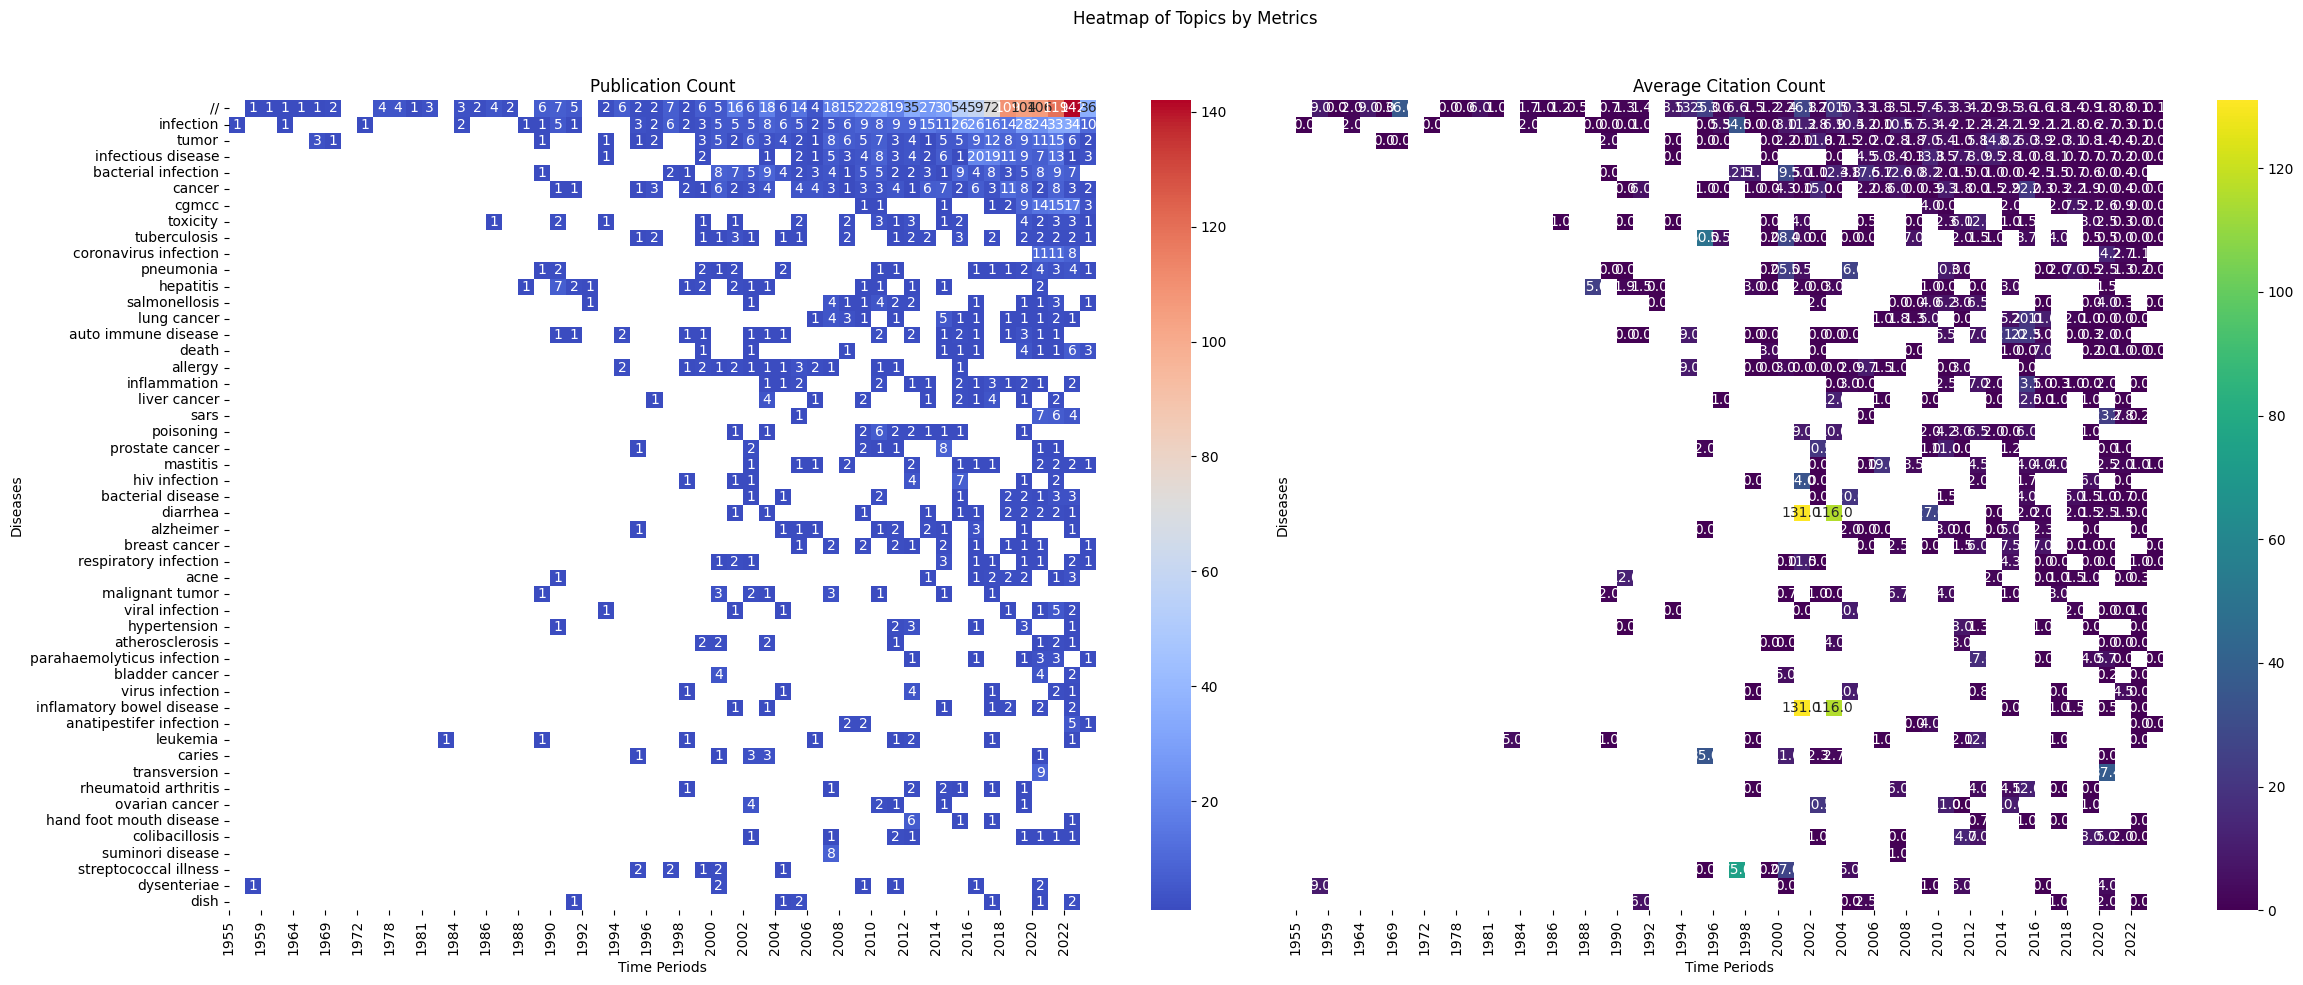

In [237]:
index_cols = 'Applicants_regions'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(3, 5)
xlabel = "Appl. Regions"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [238]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 6)

##  Applicants countries

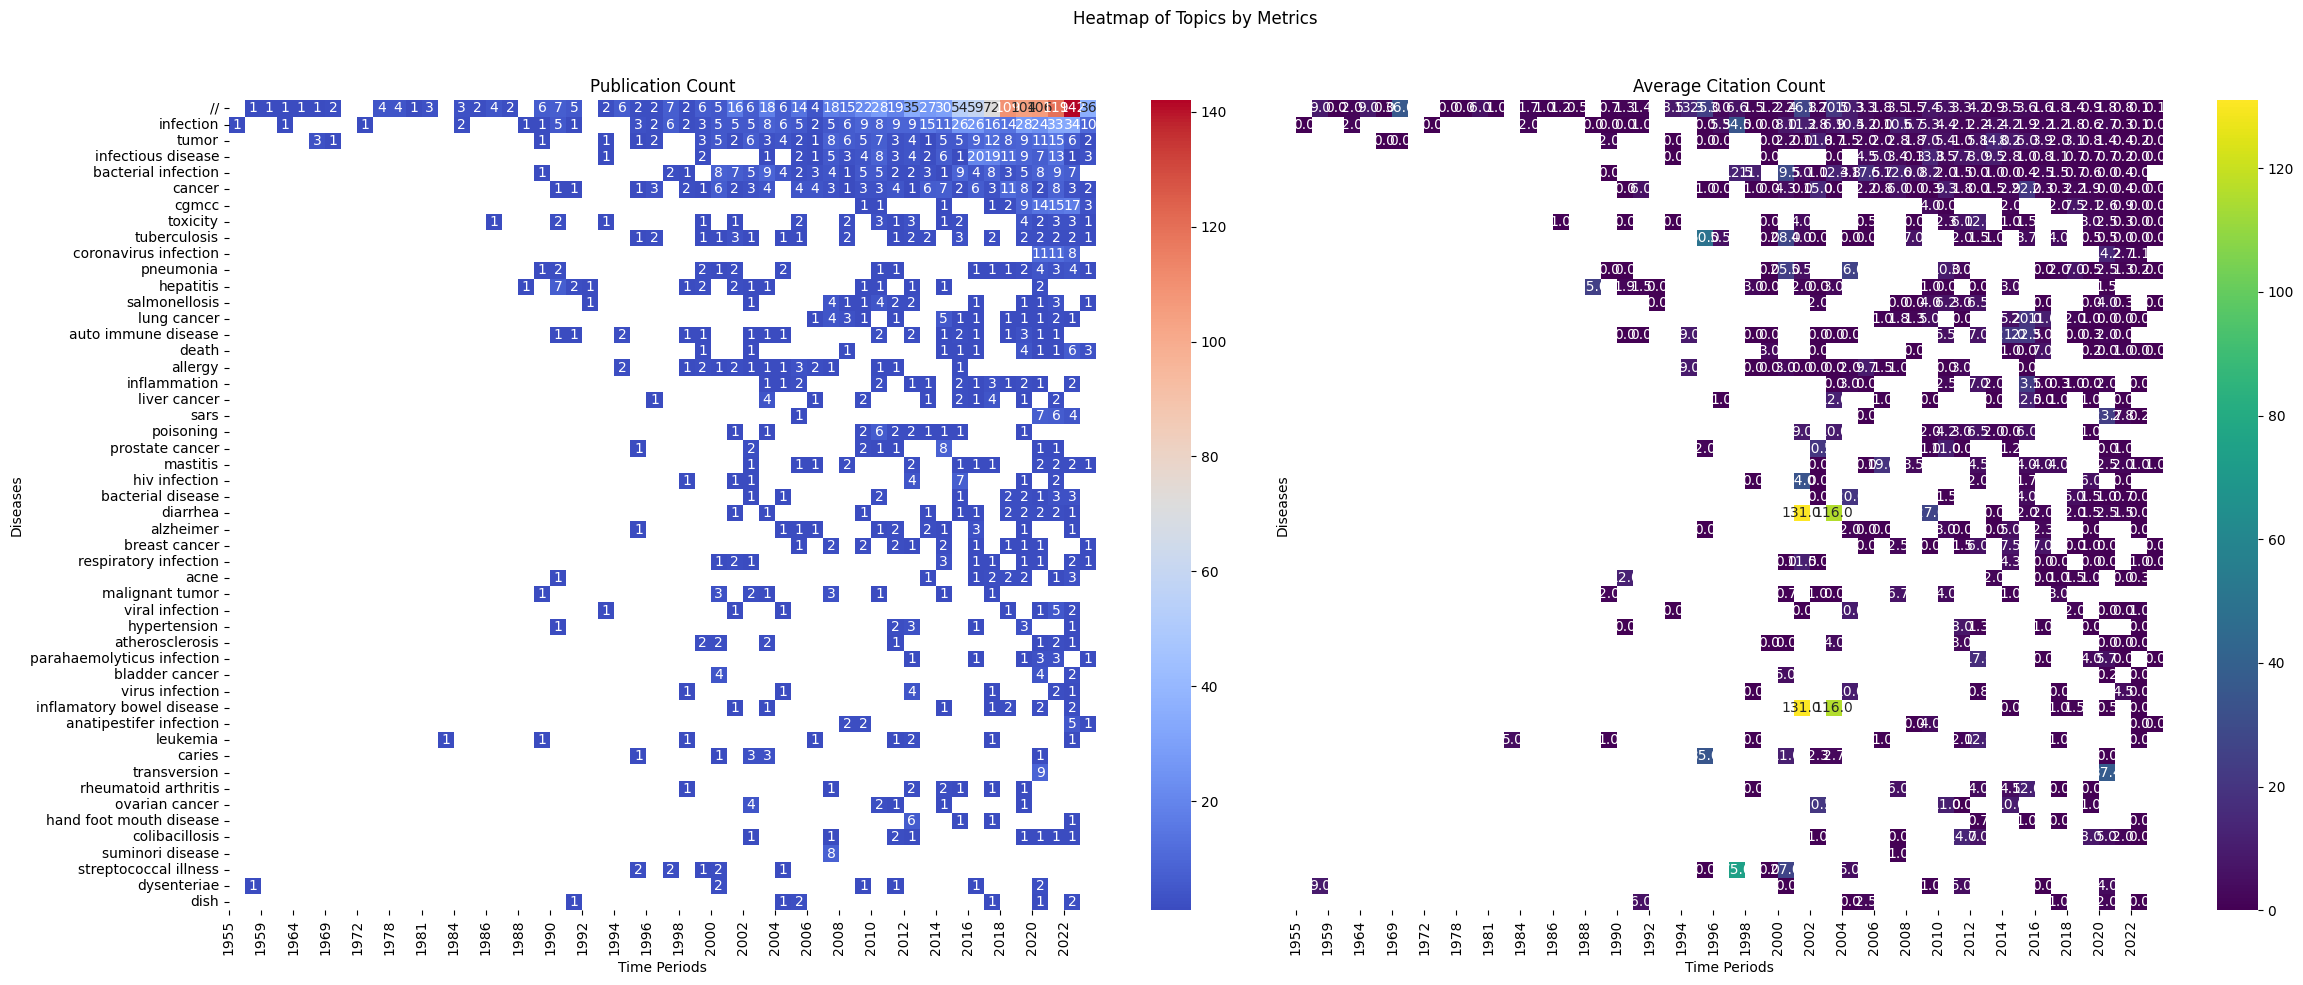

In [239]:
index_cols = 'Applicants_countries'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Applicants countries"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [240]:
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel).savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4b.eps', format='eps')
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel).savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4b.png', format='png')


In [241]:
df

Applicants_countries                                China  United States  \
Clean_Diseases                                                             
01 Certain Infectious Or Parasitic Diseases         244.0          130.0   
02 Neoplasms                                        120.0           51.0   
21 Symptoms- Signs Or Clinical Findings- Not El...   49.0            9.0   
13 Diseases Of The Digestive System                  18.0           17.0   
04 Diseases Of The Immune System                     27.0            5.0   
12 Diseases Of The Respiratory System                20.0            9.0   
14 Diseases Of The Skin                              14.0           10.0   
16 Diseases Of The Genitourinary System              12.0            6.0   
22 Injury- Poisoning Or Certain Other Consequen...    4.0            3.0   
11 Diseases Of The Circulatory System                16.0            4.0   
05 Endocrine- Nutritional Or Metabolic Diseases      11.0            2.0   
15 Diseases Of The Musculoskeletal System Or Co...    9.0            3.0   
08 Diseases Of The Nervous System                     4.0            3.0   
09 Diseases Of The Visual System                      2.0            1.0   
06 Mental- Behavioural Or Neurodevelopmental Di...    1.0            NaN   

Applicants_countries                                South Korea  Japan  \
Clean_Diseases                                                           
01 Certain Infectious Or Parasitic Diseases               158.0   28.0   
02 Neoplasms                                               12.0   17.0   
21 Symptoms- Signs Or Clinical Findings- Not El...          3.0    2.0   
13 Diseases Of The Digestive System                         5.0   15.0   
04 Diseases Of The Immune System                            3.0   10.0   
12 Diseases Of The Respiratory System                       2.0    1.0   
14 Diseases Of The Skin                                     3.0    3.0   
16 Diseases Of The Genitourinary System                     3.0    2.0   
22 Injury- Poisoning Or Certain Other Consequen...         14.0    1.0   
11 Diseases Of The Circulatory System                       NaN    3.0   
05 Endocrine- Nutritional Or Metabolic Diseases             3.0    5.0   
15 Diseases Of The Musculoskeletal System Or Co...          2.0    3.0   
08 Diseases Of The Nervous System                           3.0    3.0   
09 Diseases Of The Visual System                            1.0    1.0   
06 Mental- Behavioural Or Neurodevelopmental Di...          NaN    NaN   

Applicants_countries                                Russia  United Kingdom  \
Clean_Diseases                                                               
01 Certain Infectious Or Parasitic Diseases           33.0            20.0   
02 Neoplasms                                           4.0             3.0   
21 Symptoms- Signs Or Clinical Findings- Not El...     7.0             2.0   
13 Diseases Of The Digestive System                    1.0             1.0   
04 Diseases Of The Immune System                       1.0             NaN   
12 Diseases Of The Respiratory System                  7.0             1.0   
14 Diseases Of The Skin                                1.0             3.0   
16 Diseases Of The Genitourinary System                2.0             1.0   
22 Injury- Poisoning Or Certain Other Consequen...     5.0             NaN   
11 Diseases Of The Circulatory System                  NaN             NaN   
05 Endocrine- Nutritional Or Metabolic Diseases        NaN             NaN   
15 Diseases Of The Musculoskeletal System Or Co...     NaN             NaN   
08 Diseases Of The Nervous System                      NaN             NaN   
09 Diseases Of The Visual System                       2.0             1.0   
06 Mental- Behavioural Or Neurodevelopmental Di...     NaN             NaN   

Applicants_countries                                Canada  Switzerland  \
Clean_Diseases                                

In [242]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 20)

##  Applicants

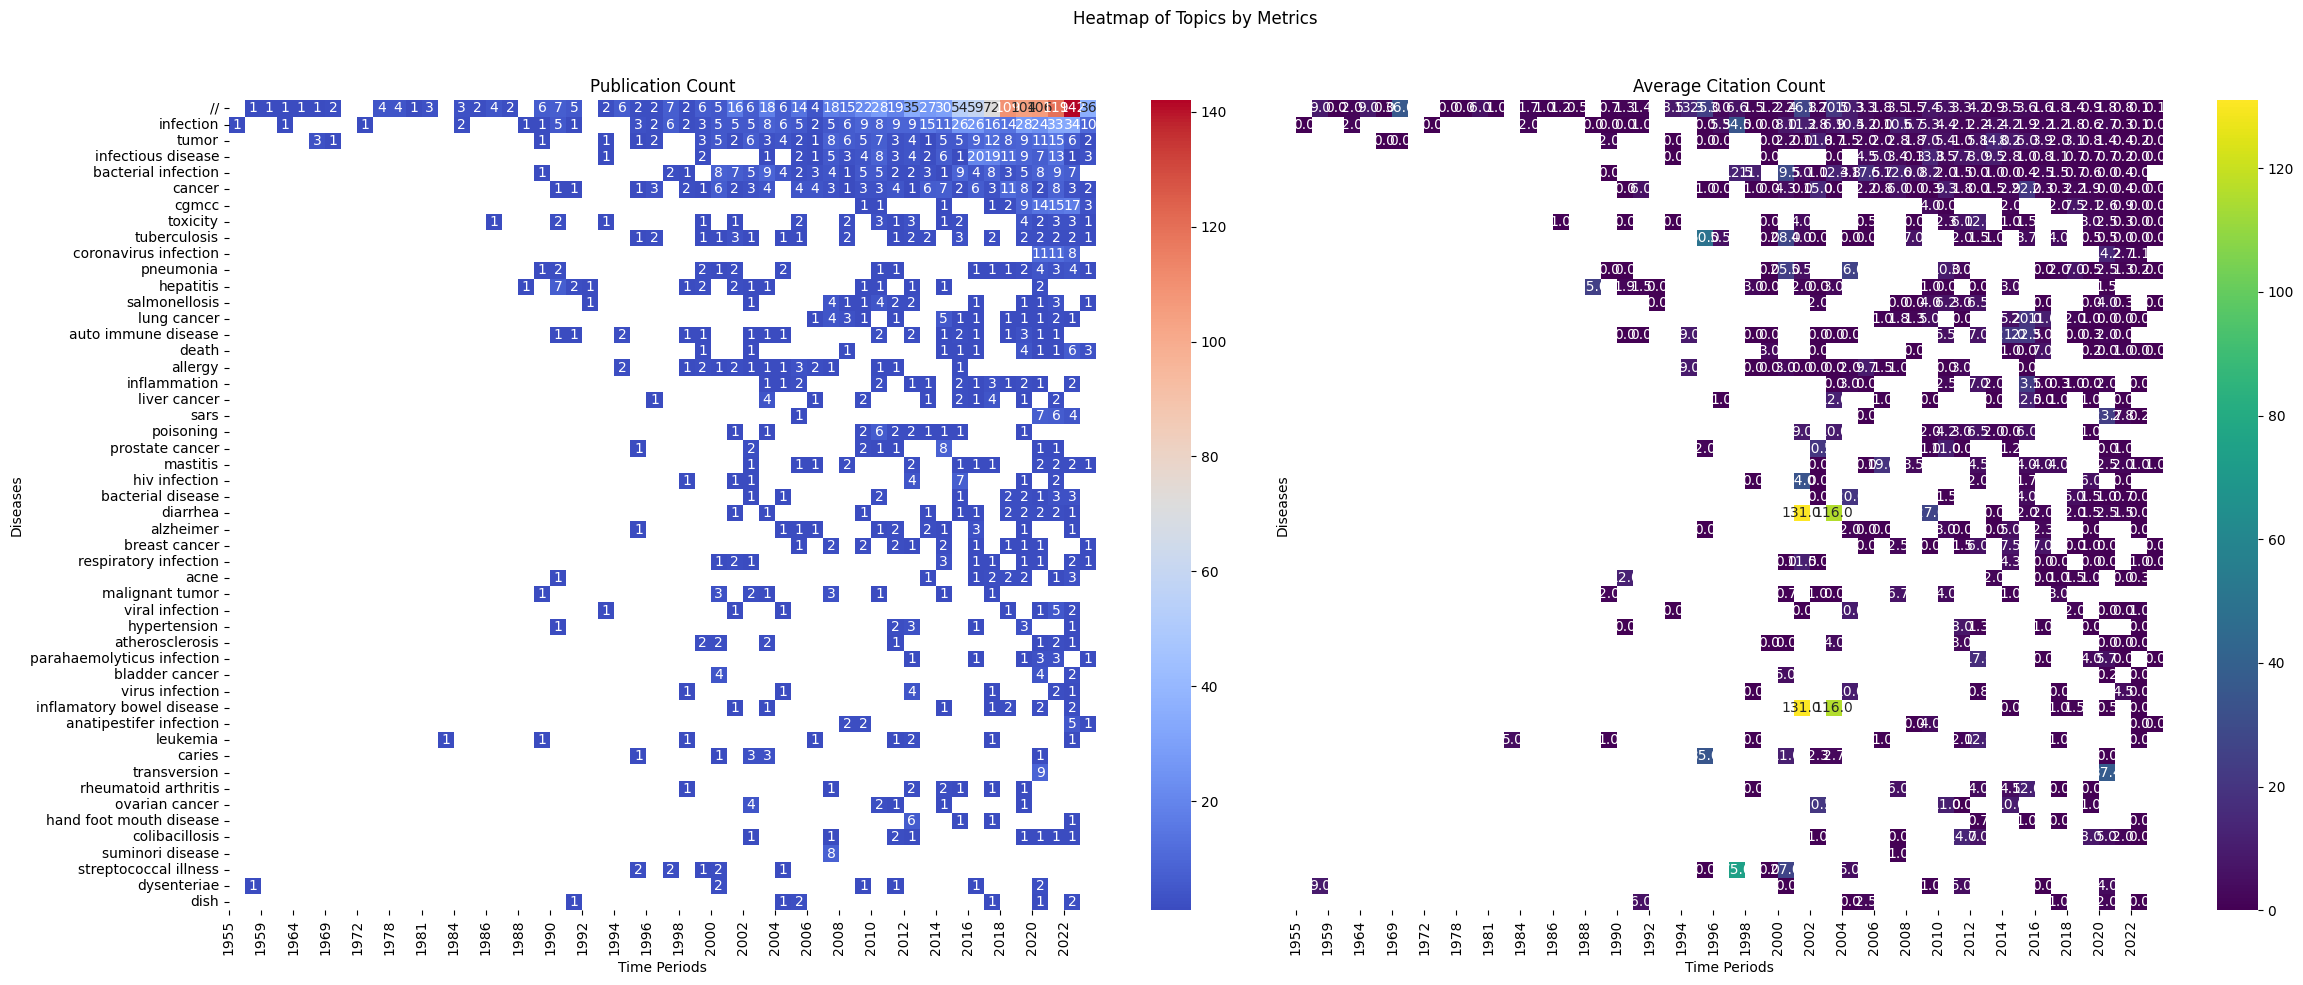

In [243]:
index_cols = 'Applicants'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Applicants"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [244]:
df

Applicants                                          Optipharm Co Ltd  \
Clean_Diseases                                                         
01 Certain Infectious Or Parasitic Diseases                     37.0   
02 Neoplasms                                                     NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...               1.0   
13 Diseases Of The Digestive System                              NaN   
04 Diseases Of The Immune System                                 NaN   
12 Diseases Of The Respiratory System                            NaN   
14 Diseases Of The Skin                                          NaN   
16 Diseases Of The Genitourinary System                          NaN   
22 Injury- Poisoning Or Certain Other Consequen...               NaN   
11 Diseases Of The Circulatory System                            NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                  NaN   
15 Diseases Of The Musculoskeletal System Or Co...               NaN   
08 Diseases Of The Nervous System                                NaN   
09 Diseases Of The Visual System                                 NaN   
06 Mental- Behavioural Or Neurodevelopmental Di...               NaN   

Applicants                                          Intron Biotechnology Inc  \
Clean_Diseases                                                                 
01 Certain Infectious Or Parasitic Diseases                             28.0   
02 Neoplasms                                                             NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...                       NaN   
13 Diseases Of The Digestive System                                      NaN   
04 Diseases Of The Immune System                                         NaN   
12 Diseases Of The Respiratory System                                    NaN   
14 Diseases Of The Skin                                                  NaN   
16 Diseases Of The Genitourinary System                                  NaN   
22 Injury- Poisoning Or Certain Other Consequen...                       NaN   
11 Diseases Of The Circulatory System                                    NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                          NaN   
15 Diseases Of The Musculoskeletal System Or Co...                       NaN   
08 Diseases Of The Nervous System                                        NaN   
09 Diseases Of The Visual System                                         NaN   
06 Mental- Behavioural Or Neurodevelopmental Di...                       NaN   

Applicants                                          Qingdao No Antibiotics Biotechnology Co Ltd  \
Clean_Diseases                                                                                    
01 Certain Infectious Or Parasitic Diseases                                                24.0   
02 Neoplasms                                                                                NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...                                          8.0   
13 Diseases Of The Digestive System                                                         NaN   
04 Diseases Of The Immune System                                                            NaN   
12 Diseases Of The Respiratory System                                                       2.0   
14 Diseases Of The Skin                                                                     1.0   
16 Diseases Of The Genitourinary System                                                     1.0   
22 Injury- Poisoning Or Certain Other Consequen...                                          NaN   
11 Diseases Of The Circulatory System                                                       NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                                             NaN   
15 Diseases Of The Musculoskeletal System Or Co...                                          NaN   
08 Diseases Of The Nervous S

In [245]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 20)

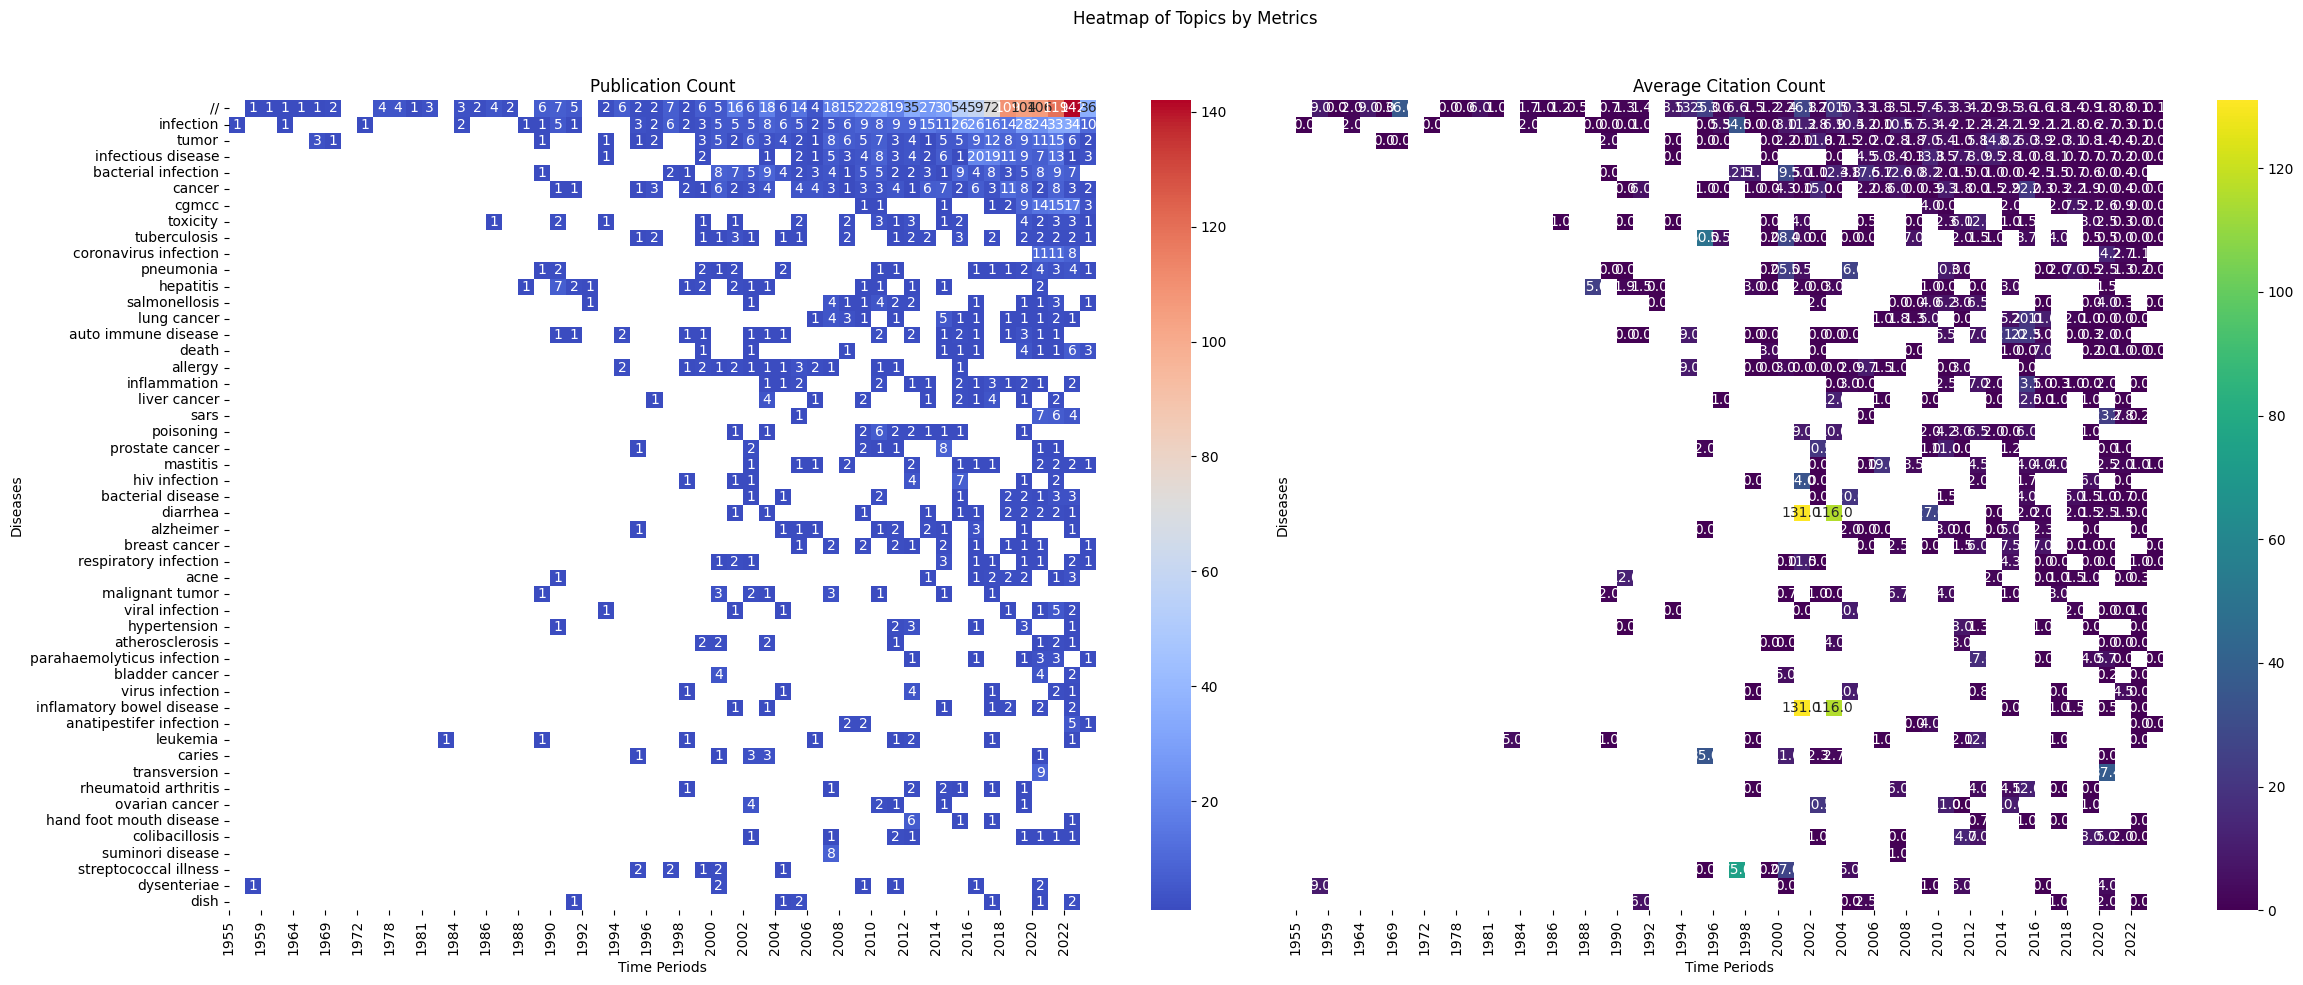

In [246]:
index_cols = 'Applicants_clean'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Applicants"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [247]:
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel).savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4c.eps', format='eps')
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel).savefig('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/MANUSCRIPT/Phage Therapy manuscripts/download 16102024/to journal/to send/figure/FIG 4c.png', format='png')


In [248]:
df

Applicants_clean                                    Intron Biotechnology Co Ltd  \
Clean_Diseases                                                                    
01 Certain Infectious Or Parasitic Diseases                                47.0   
02 Neoplasms                                                                NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...                          NaN   
13 Diseases Of The Digestive System                                         NaN   
04 Diseases Of The Immune System                                            NaN   
12 Diseases Of The Respiratory System                                       1.0   
14 Diseases Of The Skin                                                     NaN   
16 Diseases Of The Genitourinary System                                     1.0   
22 Injury- Poisoning Or Certain Other Consequen...                          NaN   
11 Diseases Of The Circulatory System                                       NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                             NaN   
15 Diseases Of The Musculoskeletal System Or Co...                          NaN   
08 Diseases Of The Nervous System                                           NaN   
09 Diseases Of The Visual System                                            NaN   
06 Mental- Behavioural Or Neurodevelopmental Di...                          NaN   

Applicants_clean                                    Optipharm Co Ltd  \
Clean_Diseases                                                         
01 Certain Infectious Or Parasitic Diseases                     37.0   
02 Neoplasms                                                     NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...               1.0   
13 Diseases Of The Digestive System                              NaN   
04 Diseases Of The Immune System                                 NaN   
12 Diseases Of The Respiratory System                            NaN   
14 Diseases Of The Skin                                          NaN   
16 Diseases Of The Genitourinary System                          NaN   
22 Injury- Poisoning Or Certain Other Consequen...               NaN   
11 Diseases Of The Circulatory System                            NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                  NaN   
15 Diseases Of The Musculoskeletal System Or Co...               NaN   
08 Diseases Of The Nervous System                                NaN   
09 Diseases Of The Visual System                                 NaN   
06 Mental- Behavioural Or Neurodevelopmental Di...               NaN   

Applicants_clean                                    Qingdao No Antibiotics Biotechnology Co Ltd  \
Clean_Diseases                                                                                    
01 Certain Infectious Or Parasitic Diseases                                                25.0   
02 Neoplasms                                                                                NaN   
21 Symptoms- Signs Or Clinical Findings- Not El...                                          8.0   
13 Diseases Of The Digestive System                                                         NaN   
04 Diseases Of The Immune System                                                            NaN   
12 Diseases Of The Respiratory System                                                       2.0   
14 Diseases Of The Skin                                                                     1.0   
16 Diseases Of The Genitourinary System                                                     1.0   
22 Injury- Poisoning Or Certain Other Consequen...                                          NaN   
11 Diseases Of The Circulatory System                                                       NaN   
05 Endocrine- Nutritional Or Metabolic Diseases                                             NaN   
15 Diseases Of The Musculoskeletal System Or Co...                          

In [249]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 20)

##  Inventors

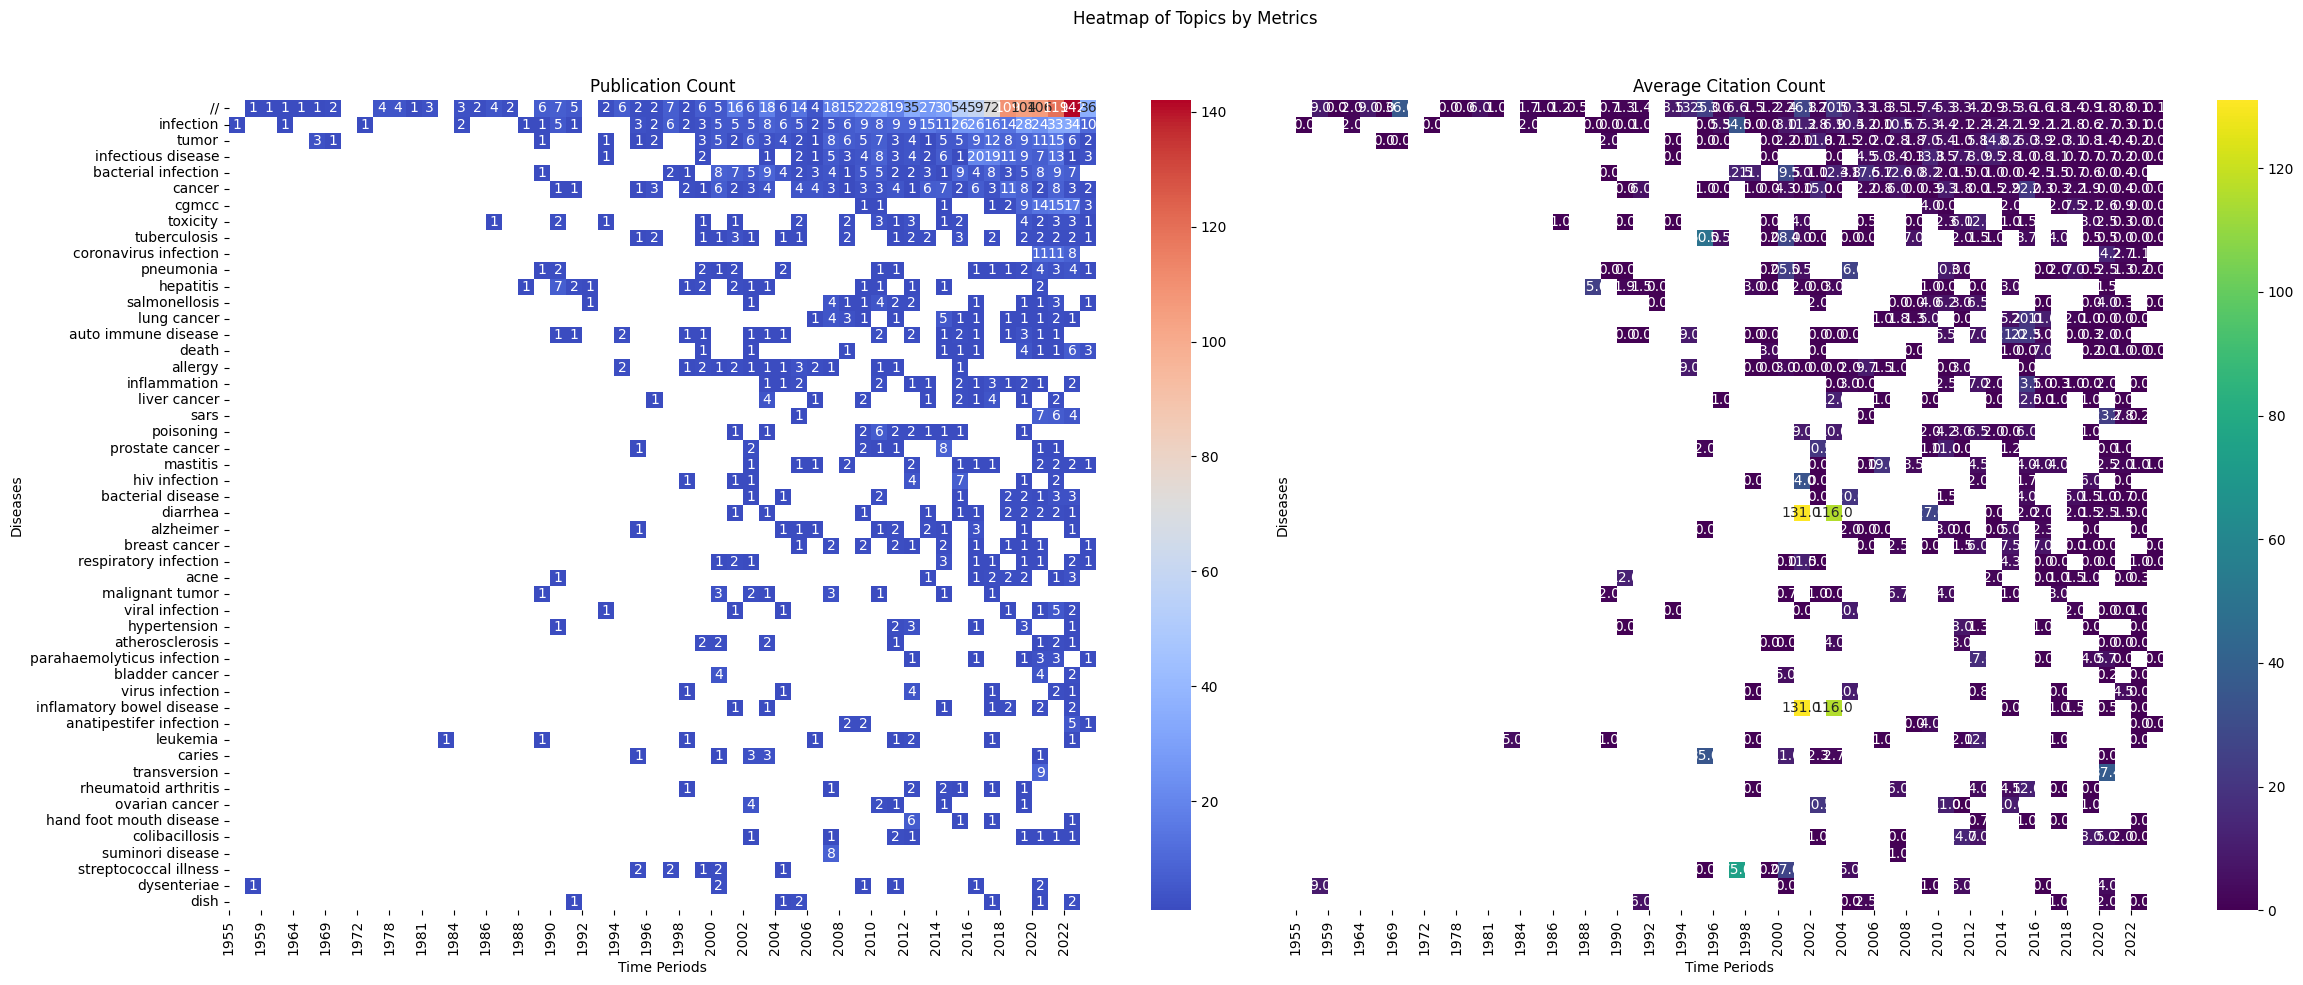

In [250]:
index_cols = 'Inventors'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Inventors"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [251]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

(15, 20)

In [ ]:
index_cols = 'Inventors_clean'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Inventors"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

## topics

In [ ]:
index_cols = 'Topic N°'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(4, 5)
xlabel = "Topics"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  IPCR Sections

In [ ]:
index_cols = 'IPCR Sections'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(4, 5)
xlabel = "IPCR Sections"
ylabel = "Diseases"

pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(pivot_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  IPCR Subclass

In [ ]:
index_cols = 'IPCR Subclass'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "IPCR Subclass"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  IPCR Class

In [ ]:
index_cols = 'IPCR Class'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(9, 5)
xlabel = "IPCR Class"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  IPCR Classifications

In [ ]:
index_cols = 'IPCR Classifications'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "IPCR Classifications"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  CPC Classifications

In [ ]:
index_cols = 'CPC Classifications'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "CPC Classifications"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

## Applicants_Last_Classification

In [ ]:
index_cols = 'Applicants_Last_Classification'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(2, 5)
xlabel = "Appl. Engage."
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  Inventors_Last_Classification

In [ ]:
index_cols = 'Inventors_Last_Classification'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(2, 5)
xlabel = "Inv. Engage."
ylabel = "Diseases"

pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(pivot_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  Jurisdiction Country

In [ ]:
index_cols = 'Jurisdiction_name'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(10, 5)
xlabel = "Jurisdiction"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape

##  Jurisdiction Region

In [ ]:
index_cols = 'Jurisdiction_Region'
split_col = 'Clean_Diseases'
top_n_col = 20
top_n_index = 15
figsize=(3, 5)
xlabel = "Jurisd. regions"
ylabel = "Diseases"

df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
plot_top_50_heatmap(df, split_col, top_n_index,  figsize, xlabel, ylabel)

In [ ]:
pivot_df = process_data(data, index_cols, split_col, top_n_index, top_n_col)
# Percentage Normalization - Normalize each row (technology) to sum to 100
percentage_normalized_df = pivot_df.div(pivot_df.sum(axis=0), axis=1) * 100

plot_top_50_heatmap(percentage_normalized_df, split_col, top_n_index,  figsize, xlabel, ylabel)
pivot_df.shape